# AIN313 - Machine Learning Lab.

**Assignment 1**

**Diesase Detection on X-Ray Images**

**Instructor: **Erkut Erdem

**TA:** Sibel Kapan


## Student Information

Please fill the informations!

Name Surname: Muhammed Görkem KOLA

Student ID: 2200765032

# PART 1

------------------------------------------------------------------------------------------------------------------

k-Nearest Neighbor Classification


------------------------------------------------------------------------------------------------------------------

1. Assume that you have a large training dataset. Specify a disadvantage of the k-Nearest Neighbor method when using it during testing. State also your reason about your answer.


*   KNN has no training step and testing step's complexity is O(N) so it would be a disadvantage when we have a large data set. It would be too slow looking at every item will be tested.


------------------------------------------------------------------------------------------------------------------

2. One of the problems with k-nearest neighbor learning is how to select a value for k. Say you are given the following data set. This is a binary classification task in which the instances are described by two real-valued attributes (+ and - denote positive and negative classes, respectively).


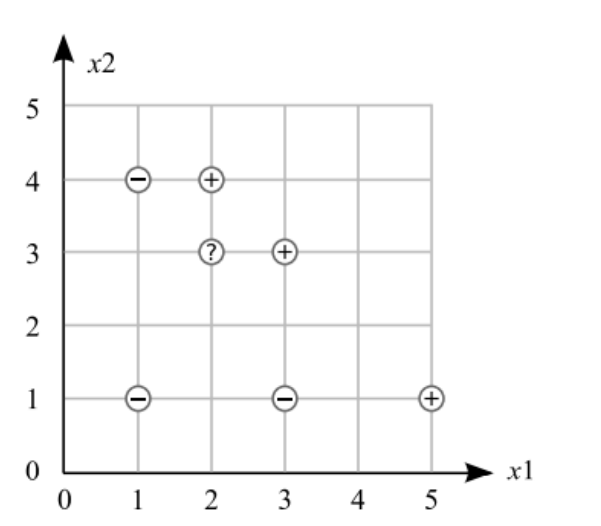

Data points are: Negative: (1, 1) (3, 1) (1, 4) Positive: (2, 4) (3, 3) (5, 1). Data points
are classified as either +1 or -1. An unknown point is located at (2, 3)

* Draw the 1-NN decision boundaries on the graph above.

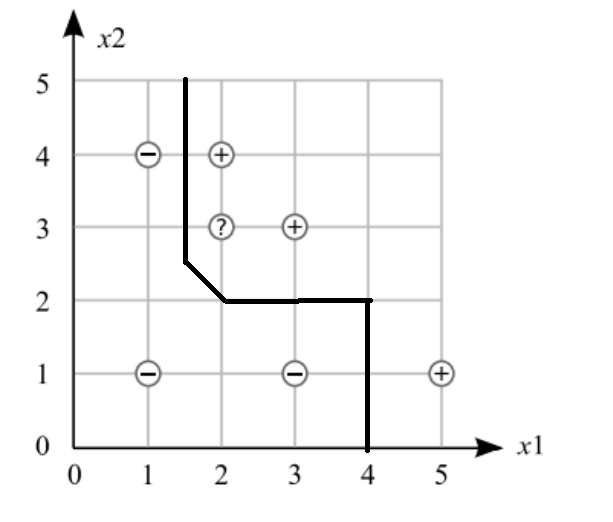

* How would 1-NN classify the unknown point (2, 3).

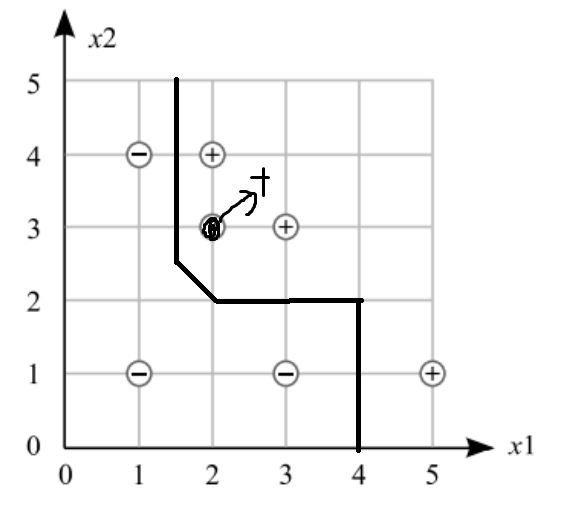

* What is the minimum value of k for the unknown value be negative?

5 because only then it the sum of the k nearest neighbors points are -1. 

* Explain the effects of the smaller and larger value of k?

It only effects decision boundries

Linear Regression

------------------------------------------------------------------------------------------------------------------

1. . Suppose we have trained a linear regression model y = ax+b where a = 0.5 and b = 1.0, on a set of training data points D=(1.0,1.6),(1.5,1.5),(3.0,2.4). Please calculate the mean squared errors of this model on D.

In [2]:
def func(x):
  a= 0.5
  b=1
  return a*x+b
D = ((1.0,1.6),(1.5,1.5),(3.0,2.4))
predicted_points = list((x,func(x)) for x,y in D)
def mse(D,P):
  # formula is 1/n*(sum of square of differences)
  return 1/len(D)*sum(list((D[i][1]-P[i][1])**2 for i in range(len(D))))
mse(D,predicted_points)

0.027500000000000014

2. Suppose you are given m=14 training examples with n=3 features (excluding the additional all-ones feature for the bias term, which you should add). Recall that the closed
form solution of linear regression is θ = (XT X)
−1XT
y For the given values of m and
n, what are the dimensions of θ, X, and y in this equation?



* I want to give the answer by showing answer



In [3]:
import numpy as np
import random
def find_theta():
  # since not every matrix has an inverse i wanted program to look for it an errorless result
  try:
    # lets create random X and 1 Y array
    
    X= np.transpose(np.array([( [1 if j == 0 else random.randint(1,1000) for i in range(14)]) for j in range(4)]))
    Y= np.transpose(np.array([random.randint(1,1000) for i in range(14)]))
    # Predict Teta Using Formula
    Theta = np.linalg.inv(np.transpose(X) @ X) 
    Theta = Theta @ np.transpose(X)
    Theta = Theta @ Y
    print("Dimension of Theta:", np.shape(Theta))
    print("Dimension of X:", np.shape(X))
    print("Dimension of Y:", np.shape(Y))
    print("******")
    print("Theta:", Theta)
    print("X:", X)
    print("Y:", Y)

    return Theta
  except:
    return find_theta()
find_theta()
print("******")

Dimension of Theta: (4,)
Dimension of X: (14, 4)
Dimension of Y: (14,)
******
Theta: [ 5.03102943e+02 -1.16380426e-01  1.67327439e-01 -2.06437998e-01]
X: [[  1 676 192 455]
 [  1 715 966 557]
 [  1 308 426  43]
 [  1 915 417 378]
 [  1 408 292 583]
 [  1 705  39 844]
 [  1 325 807 984]
 [  1 913  73 548]
 [  1 782 722 783]
 [  1 703  21 169]
 [  1 481 451 753]
 [  1 914  66 567]
 [  1 285 145  97]
 [  1 299 502 791]]
Y: [286 568 655 252 105 169 253 540 215 462 461 315 299 780]
******


3. Assume that you have seven students have registered to a class and the class have a midterm and the final exam. You have obtained a set of their marks on two exams, which is in the table below:

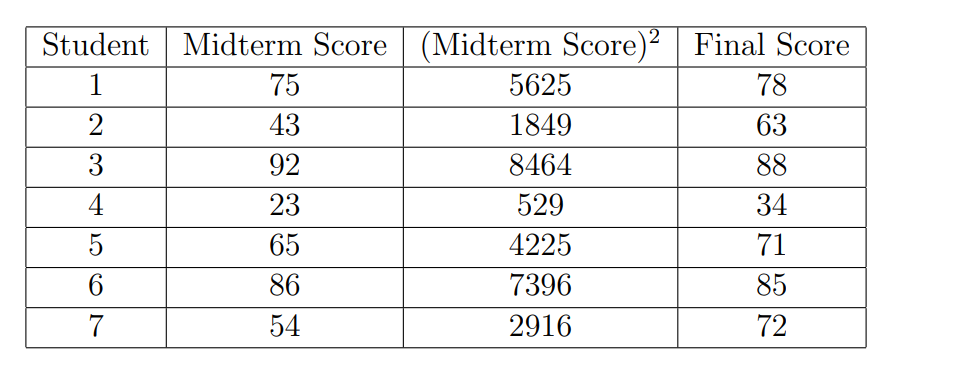

You plan to a model which form’s is fθ(x) = θ0 +θ1x1 +θ2x2 for fitting the data above. The x1 shows midterm exam score while x2 shows square of the midterm score. Besides you plan to use feature scaling (using divide operation by the ”max-min”, or range, of a feature) and mean normalization. What is the normalized value of the feature x(7)2?

* the answer is (2916-min(x1))/(max(x1)-min(x1))

In [57]:
(2916-529)/(8464-529)

0.3008191556395715

------------------------------------------------------------------------------------------------------------------

# PART 2

------------------------------------------------------------------------------------------------------------------

In [4]:
import cv2 as cv
import os
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
from multiprocessing.pool import ThreadPool
import cv2
import pandas as pd
from collections import Counter
# test paths
test_covid_dir_path = "C:\\Users\\GorkemKola\\Downloads\\chest_xray\\test\\covid"
test_normal_dir_path =  "C:\\Users\\GorkemKola\\Downloads\\chest_xray\\test\\normal"
test_pneumonia_dir_path =  "C:\\Users\\GorkemKola\\Downloads\\chest_xray\\test\\pneumonia"
# train paths
train_covid_dir_path =  "C:\\Users\\GorkemKola\\Downloads\\chest_xray\\train\\covid"
train_normal_dir_path =  "C:\\Users\\GorkemKola\\Downloads\\chest_xray\\train\\normal"
train_pneumonia_dir_path =  "C:\\Users\\GorkemKola\\Downloads\\chest_xray\\train\\pneumonia"

In [5]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1-x2)**2))
            
            
class KNN():
    def __init__(self):
        self.distance_matrix = {}

    def fit(self,X,y, weights, n_neighbors):
        self.X_train = X
        self.y_train = y
        self.weights = weights
        self.n_neighbors = n_neighbors

    def predict(self, X):
        predicted_labels = [self._predict(x) for x in X]
        return np.array(predicted_labels) 
    def _predict(self, x):
        k_indices = []
        k_nearest_labels = []
        if (x.tobytes() in self.distance_matrix):
            k_indices = self.distance_matrix[x.tobytes()][:self.n_neighbors]
        else: 
            distances = list(map(lambda x_train: euclidean_distance(x,x_train), [*self.X_train]))
            x_distance_matrix = np.argsort(distances)
            self.distance_matrix[x.tobytes()] = x_distance_matrix
            k_indices = x_distance_matrix[:self.n_neighbors]
            
        if self.weights == "uniform":
            k_nearest_labels = [self.y_train[i] for i in k_indices]
            most_common = Counter(k_nearest_labels).most_common(1)
            return most_common[0][0]
        elif self.weights == "distance":
            k_nearest_labels = {}
            for i in k_indices:
                label = self.y_train[i]
                try:
                    with np.errstate(divide='ignore'):
                        if label in k_nearest_labels:
                            k_nearest_labels[label] += 1/i
                        else:
                            k_nearest_labels[label] = 1/i
                except:
                    return label
            return max(k_nearest_labels, key=k_nearest_labels.get)
        return None

In [6]:
# listing all the images path 
test_covid_imgs = os.listdir(test_covid_dir_path)
test_normal_imgs = os.listdir(test_normal_dir_path)
test_pneumonia_imgs = os.listdir(test_pneumonia_dir_path)
train_covid_imgs = os.listdir(train_covid_dir_path)
train_normal_imgs = os.listdir(train_normal_dir_path)
train_pneumonia_imgs = os.listdir(train_pneumonia_dir_path)

In [7]:
# creating lists
test_covid_list = []
test_normal_list = []
test_pneumonia_list = []
train_covid_list = []
train_normal_list = []
train_pneumonia_list = []

In [8]:
# function to fill lists
def fill_lists(img_list, path_list, dir_path):
  for path in path_list:
    img_path = os.path.join(dir_path, path)
    img = cv.imread(img_path, cv.IMREAD_GRAYSCALE)
    try:
      img = (cv.resize(img, (32,32)))
    except:
      print(img_path)
      continue
    img_list.append(img)

In [9]:
# filling lists
fill_lists(test_covid_list, test_covid_imgs, test_covid_dir_path)
fill_lists(test_normal_list, test_normal_imgs, test_normal_dir_path)
fill_lists(test_pneumonia_list, test_pneumonia_imgs, test_pneumonia_dir_path)
fill_lists(train_covid_list, train_covid_imgs, train_covid_dir_path)
fill_lists(train_normal_list, train_normal_imgs, train_normal_dir_path)
fill_lists(train_pneumonia_list, train_pneumonia_imgs, train_pneumonia_dir_path)

C:\Users\GorkemKola\Downloads\chest_xray\train\pneumonia\pneumonia-798.jpg


In [10]:
test_covid_labels = [2 for i in range(len(test_covid_list))]
test_normal_labels = [0 for i in range(len(test_normal_list))]
test_pneumonia_labels = [1 for i in range(len(test_pneumonia_list))]
train_covid_labels = [2 for i in range(len(train_covid_list))]
train_normal_labels = [0 for i in range(len(train_normal_list))]
train_pneumonia_labels = [1 for i in range(len(train_pneumonia_list))]

In [11]:
test_lists = [*test_covid_list, *test_normal_list, *test_pneumonia_list]
train_lists = [*train_covid_list, *train_normal_list, *train_pneumonia_list]
test_labels = [*test_covid_labels, *test_normal_labels, *test_pneumonia_labels]
train_labels = [*train_covid_labels, *train_normal_labels, *train_pneumonia_labels]

In [12]:
# Canny Edge Lists
test_edges = [cv.Canny(img,100,200) for img in test_lists]
train_edges = [cv.Canny(img,100,200) for img in train_lists]

In [13]:
def build_filters():
    filters = []
    ksize = 31
    for theta in np.arange(0, np.pi, np.pi / 16):
        kern = cv2.getGaborKernel((ksize, ksize), 4.0, theta, 10.0, 0.5, 0.8, ktype=cv2.CV_32F)
        kern /= 1.5*kern.sum()
        filters.append(kern)
    return filters

def process(img, filters):
    accum = np.zeros_like(img)
    for kern in filters:
        fimg = cv2.filter2D(img, cv2.CV_8UC3, kern)
        np.maximum(accum, fimg, accum)
    return accum

def process_threaded(img, filters, threadn = 8):
    accum = np.zeros_like(img)
    def f(kern):
        return cv2.filter2D(img, cv2.CV_8UC3, kern)
    pool = ThreadPool(processes=threadn)
    for fimg in pool.imap_unordered(f, filters):
        np.maximum(accum, fimg, accum)
    return accum

In [14]:
filters = build_filters()
def gabor_kernel(imgs):
  x = []
  for img in imgs:
    res = process(img, filters)
    x.append(res)
  return x
def gabor_threaded_kernel(imgs):
  x = []
  for img in imgs:
    res = process_threaded(img, filters)
    x.append(res)
  return x

In [15]:
# gabor kernel
test_gabor = gabor_kernel(test_lists)
train_gabor = gabor_kernel(train_lists)

In [16]:
# gabor threaded kernel
test_gabor_threaded = gabor_threaded_kernel(test_lists)
train_gabor_threaded = gabor_threaded_kernel(train_lists)

In [17]:
# gabor kernel using Canny
test_edges_gabor = gabor_kernel(test_edges)
train_edges_gabor = gabor_kernel(train_edges)

In [18]:
# gabor threaded kernel using Canny
test_edges_gabor_threaded = gabor_threaded_kernel(test_edges)
train_edges_gabor_threaded = gabor_threaded_kernel(train_edges)

In [19]:
# Canny Edge using gabor Lists
test_gabor_edges = [cv.Canny(img,100,200) for img in test_gabor]
train_gabor_edges = [cv.Canny(img,100,200) for img in train_gabor]

In [20]:
# Canny Edge using gabor Lists
test_gabor_threaded_edges = [cv.Canny(img,100,200) for img in test_gabor_threaded]
train_gabor_threaded_edges = [cv.Canny(img,100,200) for img in train_gabor_threaded]

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from imutils import paths
import numpy as np
import argparse
import imutils
import cv2
import os
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import  train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from collections import Counter

In [22]:
train_y = np.array(train_labels)
test_y = np.array(test_labels)

In [23]:
classes = ["covid", "normal","pneumonia"]

In [24]:
def knn(n, train_X, train_y, array, model):
    model.fit(train_X, train_y, "uniform", n)
    pred = model.predict(test_X)
    acc = accuracy_score(pred, test_y)
    array.append(acc)
    print(classification_report(test_y, pred, target_names=classes))
def wknn(n, train_X, train_y, array, model):
    model.fit(train_X, train_y, "distance", n)
    pred = model.predict(test_X)
    acc = accuracy_score(pred, test_y)
    array.append(acc)
    print(classification_report(test_y, pred, target_names=classes))


In [25]:
imgs_uniform_acc = []
imgs_distance_acc = []

edges_uniform_acc = []
edges_distance_acc = []

gabor_uniform_acc = []
gabor_distance_acc = []

gabor_threaded_uniform_acc = []
gabor_threaded_distance_acc = []

gabor_edges_uniform_acc = []
gabor_edges_distance_acc = []

gabor_threaded_edges_uniform_acc = []
gabor_threaded_edges_distance_acc = []

edges_gabor_uniform_acc = []
edges_gabor_distance_acc = []

edges_gabor_threaded_uniform_acc = []
edges_gabor_threaded_distance_acc = []


# Results of Images

In [26]:
# set train_X and test_X for images
train_X = np.array(train_lists, dtype="object")
test_X = np.array(test_lists, dtype="object")
train_X = train_X.reshape(train_X.shape[0],-1)
test_X = test_X.reshape(test_X.shape[0],-1)
model = KNN()

In [27]:
# uniform knn for images
for i in range(1,100):
    print("for n =", i)
    knn(i, train_X, train_y, imgs_uniform_acc, model)

for n = 1
              precision    recall  f1-score   support

       covid       0.89      0.51      0.65       100
      normal       0.68      0.93      0.79       100
   pneumonia       0.91      0.97      0.94       100

    accuracy                           0.80       300
   macro avg       0.83      0.80      0.79       300
weighted avg       0.83      0.80      0.79       300

for n = 2
              precision    recall  f1-score   support

       covid       0.89      0.51      0.65       100
      normal       0.68      0.93      0.79       100
   pneumonia       0.91      0.97      0.94       100

    accuracy                           0.80       300
   macro avg       0.83      0.80      0.79       300
weighted avg       0.83      0.80      0.79       300

for n = 3
              precision    recall  f1-score   support

       covid       0.92      0.45      0.60       100
      normal       0.67      0.95      0.79       100
   pneumonia       0.89      0.98      0.93  

              precision    recall  f1-score   support

       covid       0.92      0.54      0.68       100
      normal       0.67      0.94      0.78       100
   pneumonia       0.92      0.92      0.92       100

    accuracy                           0.80       300
   macro avg       0.83      0.80      0.79       300
weighted avg       0.83      0.80      0.79       300

for n = 32
              precision    recall  f1-score   support

       covid       0.91      0.53      0.67       100
      normal       0.66      0.94      0.77       100
   pneumonia       0.93      0.92      0.92       100

    accuracy                           0.80       300
   macro avg       0.83      0.80      0.79       300
weighted avg       0.83      0.80      0.79       300

for n = 33
              precision    recall  f1-score   support

       covid       0.92      0.55      0.69       100
      normal       0.67      0.94      0.78       100
   pneumonia       0.93      0.92      0.92       100

              precision    recall  f1-score   support

       covid       0.91      0.58      0.71       100
      normal       0.68      0.93      0.78       100
   pneumonia       0.92      0.91      0.91       100

    accuracy                           0.81       300
   macro avg       0.83      0.81      0.80       300
weighted avg       0.83      0.81      0.80       300

for n = 56
              precision    recall  f1-score   support

       covid       0.91      0.59      0.72       100
      normal       0.68      0.93      0.78       100
   pneumonia       0.93      0.91      0.92       100

    accuracy                           0.81       300
   macro avg       0.84      0.81      0.81       300
weighted avg       0.84      0.81      0.81       300

for n = 57
              precision    recall  f1-score   support

       covid       0.89      0.59      0.71       100
      normal       0.68      0.92      0.78       100
   pneumonia       0.93      0.91      0.92       100

              precision    recall  f1-score   support

       covid       0.86      0.60      0.71       100
      normal       0.68      0.90      0.77       100
   pneumonia       0.95      0.92      0.93       100

    accuracy                           0.81       300
   macro avg       0.83      0.81      0.80       300
weighted avg       0.83      0.81      0.80       300

for n = 94
              precision    recall  f1-score   support

       covid       0.85      0.58      0.69       100
      normal       0.66      0.90      0.76       100
   pneumonia       0.95      0.91      0.93       100

    accuracy                           0.80       300
   macro avg       0.82      0.80      0.79       300
weighted avg       0.82      0.80      0.79       300

for n = 95
              precision    recall  f1-score   support

       covid       0.85      0.58      0.69       100
      normal       0.67      0.90      0.77       100
   pneumonia       0.95      0.92      0.93       100

In [28]:
# weighted knn for images
for i in range(1,100):
    print("for n =", i)
    wknn(i, train_X, train_y, imgs_distance_acc, model)

for n = 1
              precision    recall  f1-score   support

       covid       0.89      0.51      0.65       100
      normal       0.68      0.93      0.79       100
   pneumonia       0.91      0.97      0.94       100

    accuracy                           0.80       300
   macro avg       0.83      0.80      0.79       300
weighted avg       0.83      0.80      0.79       300

for n = 2
              precision    recall  f1-score   support

       covid       0.87      0.53      0.66       100
      normal       0.73      0.91      0.81       100
   pneumonia       0.88      1.00      0.93       100

    accuracy                           0.81       300
   macro avg       0.82      0.81      0.80       300
weighted avg       0.82      0.81      0.80       300

for n = 3
              precision    recall  f1-score   support

       covid       0.90      0.46      0.61       100
      normal       0.70      0.94      0.80       100
   pneumonia       0.88      1.00      0.93  

              precision    recall  f1-score   support

       covid       0.83      0.59      0.69       100
      normal       0.80      0.86      0.83       100
   pneumonia       0.83      1.00      0.90       100

    accuracy                           0.82       300
   macro avg       0.82      0.82      0.81       300
weighted avg       0.82      0.82      0.81       300

for n = 26
              precision    recall  f1-score   support

       covid       0.81      0.60      0.69       100
      normal       0.80      0.84      0.82       100
   pneumonia       0.83      1.00      0.90       100

    accuracy                           0.81       300
   macro avg       0.81      0.81      0.80       300
weighted avg       0.81      0.81      0.80       300

for n = 27
              precision    recall  f1-score   support

       covid       0.79      0.59      0.67       100
      normal       0.78      0.82      0.80       100
   pneumonia       0.83      1.00      0.91       100

              precision    recall  f1-score   support

       covid       0.78      0.63      0.70       100
      normal       0.80      0.79      0.79       100
   pneumonia       0.83      1.00      0.91       100

    accuracy                           0.81       300
   macro avg       0.80      0.81      0.80       300
weighted avg       0.80      0.81      0.80       300

for n = 50
              precision    recall  f1-score   support

       covid       0.79      0.65      0.71       100
      normal       0.82      0.80      0.81       100
   pneumonia       0.83      1.00      0.91       100

    accuracy                           0.82       300
   macro avg       0.81      0.82      0.81       300
weighted avg       0.81      0.82      0.81       300

for n = 51
              precision    recall  f1-score   support

       covid       0.78      0.64      0.70       100
      normal       0.80      0.78      0.79       100
   pneumonia       0.83      1.00      0.90       100

              precision    recall  f1-score   support

       covid       0.75      0.63      0.68       100
      normal       0.78      0.72      0.75       100
   pneumonia       0.81      1.00      0.89       100

    accuracy                           0.78       300
   macro avg       0.78      0.78      0.78       300
weighted avg       0.78      0.78      0.78       300

for n = 71
              precision    recall  f1-score   support

       covid       0.76      0.65      0.70       100
      normal       0.80      0.71      0.75       100
   pneumonia       0.80      1.00      0.89       100

    accuracy                           0.79       300
   macro avg       0.78      0.79      0.78       300
weighted avg       0.78      0.79      0.78       300

for n = 72
              precision    recall  f1-score   support

       covid       0.76      0.65      0.70       100
      normal       0.80      0.72      0.76       100
   pneumonia       0.81      1.00      0.89       100

              precision    recall  f1-score   support

       covid       0.73      0.60      0.66       100
      normal       0.76      0.70      0.73       100
   pneumonia       0.79      1.00      0.88       100

    accuracy                           0.77       300
   macro avg       0.76      0.77      0.76       300
weighted avg       0.76      0.77      0.76       300

for n = 93
              precision    recall  f1-score   support

       covid       0.73      0.61      0.67       100
      normal       0.78      0.70      0.74       100
   pneumonia       0.79      1.00      0.88       100

    accuracy                           0.77       300
   macro avg       0.77      0.77      0.76       300
weighted avg       0.77      0.77      0.76       300

for n = 94
              precision    recall  f1-score   support

       covid       0.74      0.62      0.67       100
      normal       0.79      0.70      0.74       100
   pneumonia       0.79      1.00      0.88       100

In [29]:
# set train_X and test_X for edges
train_X = np.array(train_edges, dtype="object")
test_X = np.array(test_edges, dtype="object")
train_X = train_X.reshape(train_X.shape[0],-1)
test_X = test_X.reshape(test_X.shape[0],-1)
model=KNN()

In [30]:
# uniform knn for edges
for i in range(1,100):
    print("for n =", i)
    knn(i, train_X, train_y, edges_uniform_acc, model)

for n = 1
              precision    recall  f1-score   support

       covid       0.89      0.24      0.38       100
      normal       0.55      0.24      0.33       100
   pneumonia       0.43      0.98      0.60       100

    accuracy                           0.49       300
   macro avg       0.62      0.49      0.44       300
weighted avg       0.62      0.49      0.44       300

for n = 2
              precision    recall  f1-score   support

       covid       0.89      0.24      0.38       100
      normal       0.55      0.24      0.33       100
   pneumonia       0.43      0.98      0.60       100

    accuracy                           0.49       300
   macro avg       0.62      0.49      0.44       300
weighted avg       0.62      0.49      0.44       300

for n = 3
              precision    recall  f1-score   support

       covid       0.95      0.21      0.34       100
      normal       0.46      0.16      0.24       100
   pneumonia       0.41      1.00      0.58  

              precision    recall  f1-score   support

       covid       0.94      0.17      0.29       100
      normal       0.64      0.50      0.56       100
   pneumonia       0.49      1.00      0.66       100

    accuracy                           0.56       300
   macro avg       0.69      0.56      0.50       300
weighted avg       0.69      0.56      0.50       300

for n = 37
              precision    recall  f1-score   support

       covid       0.94      0.16      0.27       100
      normal       0.67      0.54      0.60       100
   pneumonia       0.50      1.00      0.66       100

    accuracy                           0.57       300
   macro avg       0.70      0.57      0.51       300
weighted avg       0.70      0.57      0.51       300

for n = 38
              precision    recall  f1-score   support

       covid       0.94      0.17      0.29       100
      normal       0.67      0.57      0.62       100
   pneumonia       0.51      1.00      0.67       100

              precision    recall  f1-score   support

       covid       0.94      0.16      0.27       100
      normal       0.63      0.56      0.59       100
   pneumonia       0.52      1.00      0.68       100

    accuracy                           0.57       300
   macro avg       0.70      0.57      0.52       300
weighted avg       0.70      0.57      0.52       300

for n = 63
              precision    recall  f1-score   support

       covid       0.94      0.16      0.27       100
      normal       0.64      0.56      0.60       100
   pneumonia       0.51      1.00      0.68       100

    accuracy                           0.57       300
   macro avg       0.70      0.57      0.52       300
weighted avg       0.70      0.57      0.52       300

for n = 64
              precision    recall  f1-score   support

       covid       0.94      0.16      0.27       100
      normal       0.64      0.56      0.60       100
   pneumonia       0.51      1.00      0.68       100

              precision    recall  f1-score   support

       covid       0.93      0.13      0.23       100
      normal       0.62      0.55      0.58       100
   pneumonia       0.51      1.00      0.67       100

    accuracy                           0.56       300
   macro avg       0.68      0.56      0.49       300
weighted avg       0.68      0.56      0.49       300

for n = 94
              precision    recall  f1-score   support

       covid       0.93      0.13      0.23       100
      normal       0.61      0.54      0.57       100
   pneumonia       0.51      1.00      0.67       100

    accuracy                           0.56       300
   macro avg       0.68      0.56      0.49       300
weighted avg       0.68      0.56      0.49       300

for n = 95
              precision    recall  f1-score   support

       covid       0.93      0.13      0.23       100
      normal       0.61      0.54      0.57       100
   pneumonia       0.51      1.00      0.67       100

In [31]:
# weighted knn for edges
for i in range(1,100):
    print("for n =", i)
    wknn(i, train_X, train_y, edges_distance_acc, model)

for n = 1
              precision    recall  f1-score   support

       covid       0.89      0.24      0.38       100
      normal       0.55      0.24      0.33       100
   pneumonia       0.43      0.98      0.60       100

    accuracy                           0.49       300
   macro avg       0.62      0.49      0.44       300
weighted avg       0.62      0.49      0.44       300

for n = 2
              precision    recall  f1-score   support

       covid       0.88      0.21      0.34       100
      normal       0.60      0.09      0.16       100
   pneumonia       0.38      1.00      0.55       100

    accuracy                           0.43       300
   macro avg       0.62      0.43      0.35       300
weighted avg       0.62      0.43      0.35       300

for n = 3
              precision    recall  f1-score   support

       covid       0.94      0.15      0.26       100
      normal       0.62      0.08      0.14       100
   pneumonia       0.37      1.00      0.54  

C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

              precision    recall  f1-score   support

       covid       1.00      0.01      0.02       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.33      1.00      0.50       100

    accuracy                           0.34       300
   macro avg       0.44      0.34      0.17       300
weighted avg       0.44      0.34      0.17       300

for n = 18
              precision    recall  f1-score   support

       covid       1.00      0.01      0.02       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.33      1.00      0.50       100

    accuracy                           0.34       300
   macro avg       0.44      0.34      0.17       300
weighted avg       0.44      0.34      0.17       300

for n = 19
              precision    recall  f1-score   support

       covid       1.00      0.01      0.02       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.33      1.00      0.50       100

C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

              precision    recall  f1-score   support

       covid       1.00      0.01      0.02       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.33      1.00      0.50       100

    accuracy                           0.34       300
   macro avg       0.44      0.34      0.17       300
weighted avg       0.44      0.34      0.17       300

for n = 25
              precision    recall  f1-score   support

       covid       1.00      0.01      0.02       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.33      1.00      0.50       100

    accuracy                           0.34       300
   macro avg       0.44      0.34      0.17       300
weighted avg       0.44      0.34      0.17       300

for n = 26
              precision    recall  f1-score   support

       covid       1.00      0.01      0.02       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.33      1.00      0.50       100

C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

              precision    recall  f1-score   support

       covid       1.00      0.01      0.02       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.33      1.00      0.50       100

    accuracy                           0.34       300
   macro avg       0.44      0.34      0.17       300
weighted avg       0.44      0.34      0.17       300

for n = 30
              precision    recall  f1-score   support

       covid       1.00      0.01      0.02       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.33      1.00      0.50       100

    accuracy                           0.34       300
   macro avg       0.44      0.34      0.17       300
weighted avg       0.44      0.34      0.17       300

for n = 31
              precision    recall  f1-score   support

       covid       1.00      0.01      0.02       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.33      1.00      0.50       100

C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

              precision    recall  f1-score   support

       covid       1.00      0.01      0.02       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.33      1.00      0.50       100

    accuracy                           0.34       300
   macro avg       0.44      0.34      0.17       300
weighted avg       0.44      0.34      0.17       300

for n = 34
              precision    recall  f1-score   support

       covid       1.00      0.01      0.02       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.33      1.00      0.50       100

    accuracy                           0.34       300
   macro avg       0.44      0.34      0.17       300
weighted avg       0.44      0.34      0.17       300

for n = 35
              precision    recall  f1-score   support

       covid       1.00      0.01      0.02       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.33      1.00      0.50       100

C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

              precision    recall  f1-score   support

       covid       1.00      0.01      0.02       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.33      1.00      0.50       100

    accuracy                           0.34       300
   macro avg       0.44      0.34      0.17       300
weighted avg       0.44      0.34      0.17       300

for n = 38
              precision    recall  f1-score   support

       covid       1.00      0.01      0.02       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.33      1.00      0.50       100

    accuracy                           0.34       300
   macro avg       0.44      0.34      0.17       300
weighted avg       0.44      0.34      0.17       300

for n = 39
              precision    recall  f1-score   support

       covid       1.00      0.01      0.02       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.33      1.00      0.50       100

C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

              precision    recall  f1-score   support

       covid       1.00      0.01      0.02       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.33      1.00      0.50       100

    accuracy                           0.34       300
   macro avg       0.44      0.34      0.17       300
weighted avg       0.44      0.34      0.17       300

for n = 42
              precision    recall  f1-score   support

       covid       1.00      0.01      0.02       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.33      1.00      0.50       100

    accuracy                           0.34       300
   macro avg       0.44      0.34      0.17       300
weighted avg       0.44      0.34      0.17       300

for n = 43
              precision    recall  f1-score   support

       covid       1.00      0.01      0.02       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.33      1.00      0.50       100

C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

              precision    recall  f1-score   support

       covid       1.00      0.01      0.02       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.33      1.00      0.50       100

    accuracy                           0.34       300
   macro avg       0.44      0.34      0.17       300
weighted avg       0.44      0.34      0.17       300

for n = 46
              precision    recall  f1-score   support

       covid       1.00      0.01      0.02       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.33      1.00      0.50       100

    accuracy                           0.34       300
   macro avg       0.44      0.34      0.17       300
weighted avg       0.44      0.34      0.17       300

for n = 47
              precision    recall  f1-score   support

       covid       1.00      0.01      0.02       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.33      1.00      0.50       100

C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

              precision    recall  f1-score   support

       covid       1.00      0.01      0.02       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.33      1.00      0.50       100

    accuracy                           0.34       300
   macro avg       0.44      0.34      0.17       300
weighted avg       0.44      0.34      0.17       300

for n = 49
              precision    recall  f1-score   support

       covid       1.00      0.01      0.02       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.33      1.00      0.50       100

    accuracy                           0.34       300
   macro avg       0.44      0.34      0.17       300
weighted avg       0.44      0.34      0.17       300

for n = 50
              precision    recall  f1-score   support

       covid       1.00      0.01      0.02       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.33      1.00      0.50       100

C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

              precision    recall  f1-score   support

       covid       1.00      0.01      0.02       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.33      1.00      0.50       100

    accuracy                           0.34       300
   macro avg       0.44      0.34      0.17       300
weighted avg       0.44      0.34      0.17       300

for n = 52
              precision    recall  f1-score   support

       covid       1.00      0.01      0.02       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.33      1.00      0.50       100

    accuracy                           0.34       300
   macro avg       0.44      0.34      0.17       300
weighted avg       0.44      0.34      0.17       300

for n = 53
              precision    recall  f1-score   support

       covid       1.00      0.01      0.02       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.33      1.00      0.50       100

C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

              precision    recall  f1-score   support

       covid       1.00      0.01      0.02       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.33      1.00      0.50       100

    accuracy                           0.34       300
   macro avg       0.44      0.34      0.17       300
weighted avg       0.44      0.34      0.17       300

for n = 55
              precision    recall  f1-score   support

       covid       1.00      0.01      0.02       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.33      1.00      0.50       100

    accuracy                           0.34       300
   macro avg       0.44      0.34      0.17       300
weighted avg       0.44      0.34      0.17       300

for n = 56
              precision    recall  f1-score   support

       covid       1.00      0.01      0.02       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.33      1.00      0.50       100

C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

              precision    recall  f1-score   support

       covid       1.00      0.01      0.02       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.33      1.00      0.50       100

    accuracy                           0.34       300
   macro avg       0.44      0.34      0.17       300
weighted avg       0.44      0.34      0.17       300

for n = 58
              precision    recall  f1-score   support

       covid       1.00      0.01      0.02       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.33      1.00      0.50       100

    accuracy                           0.34       300
   macro avg       0.44      0.34      0.17       300
weighted avg       0.44      0.34      0.17       300

for n = 59
              precision    recall  f1-score   support

       covid       1.00      0.01      0.02       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.33      1.00      0.50       100

C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

              precision    recall  f1-score   support

       covid       1.00      0.01      0.02       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.33      1.00      0.50       100

    accuracy                           0.34       300
   macro avg       0.44      0.34      0.17       300
weighted avg       0.44      0.34      0.17       300

for n = 61
              precision    recall  f1-score   support

       covid       1.00      0.01      0.02       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.33      1.00      0.50       100

    accuracy                           0.34       300
   macro avg       0.44      0.34      0.17       300
weighted avg       0.44      0.34      0.17       300

for n = 62
              precision    recall  f1-score   support

       covid       1.00      0.01      0.02       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.33      1.00      0.50       100

C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

              precision    recall  f1-score   support

       covid       1.00      0.01      0.02       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.33      1.00      0.50       100

    accuracy                           0.34       300
   macro avg       0.44      0.34      0.17       300
weighted avg       0.44      0.34      0.17       300

for n = 64
              precision    recall  f1-score   support

       covid       1.00      0.01      0.02       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.33      1.00      0.50       100

    accuracy                           0.34       300
   macro avg       0.44      0.34      0.17       300
weighted avg       0.44      0.34      0.17       300

for n = 65


C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

              precision    recall  f1-score   support

       covid       1.00      0.01      0.02       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.33      1.00      0.50       100

    accuracy                           0.34       300
   macro avg       0.44      0.34      0.17       300
weighted avg       0.44      0.34      0.17       300

for n = 66
              precision    recall  f1-score   support

       covid       1.00      0.01      0.02       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.33      1.00      0.50       100

    accuracy                           0.34       300
   macro avg       0.44      0.34      0.17       300
weighted avg       0.44      0.34      0.17       300

for n = 67
              precision    recall  f1-score   support

       covid       1.00      0.01      0.02       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.33      1.00      0.50       100

C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

              precision    recall  f1-score   support

       covid       1.00      0.01      0.02       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.33      1.00      0.50       100

    accuracy                           0.34       300
   macro avg       0.44      0.34      0.17       300
weighted avg       0.44      0.34      0.17       300

for n = 69
              precision    recall  f1-score   support

       covid       1.00      0.01      0.02       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.33      1.00      0.50       100

    accuracy                           0.34       300
   macro avg       0.44      0.34      0.17       300
weighted avg       0.44      0.34      0.17       300

for n = 70


C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

              precision    recall  f1-score   support

       covid       1.00      0.01      0.02       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.33      1.00      0.50       100

    accuracy                           0.34       300
   macro avg       0.44      0.34      0.17       300
weighted avg       0.44      0.34      0.17       300

for n = 71
              precision    recall  f1-score   support

       covid       1.00      0.01      0.02       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.33      1.00      0.50       100

    accuracy                           0.34       300
   macro avg       0.44      0.34      0.17       300
weighted avg       0.44      0.34      0.17       300

for n = 72
              precision    recall  f1-score   support

       covid       1.00      0.01      0.02       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.33      1.00      0.50       100

C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

              precision    recall  f1-score   support

       covid       1.00      0.01      0.02       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.33      1.00      0.50       100

    accuracy                           0.34       300
   macro avg       0.44      0.34      0.17       300
weighted avg       0.44      0.34      0.17       300

for n = 74
              precision    recall  f1-score   support

       covid       1.00      0.01      0.02       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.33      1.00      0.50       100

    accuracy                           0.34       300
   macro avg       0.44      0.34      0.17       300
weighted avg       0.44      0.34      0.17       300

for n = 75


C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

              precision    recall  f1-score   support

       covid       1.00      0.01      0.02       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.33      1.00      0.50       100

    accuracy                           0.34       300
   macro avg       0.44      0.34      0.17       300
weighted avg       0.44      0.34      0.17       300

for n = 76
              precision    recall  f1-score   support

       covid       1.00      0.01      0.02       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.33      1.00      0.50       100

    accuracy                           0.34       300
   macro avg       0.44      0.34      0.17       300
weighted avg       0.44      0.34      0.17       300

for n = 77


C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

              precision    recall  f1-score   support

       covid       1.00      0.01      0.02       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.33      1.00      0.50       100

    accuracy                           0.34       300
   macro avg       0.44      0.34      0.17       300
weighted avg       0.44      0.34      0.17       300

for n = 78
              precision    recall  f1-score   support

       covid       1.00      0.01      0.02       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.33      1.00      0.50       100

    accuracy                           0.34       300
   macro avg       0.44      0.34      0.17       300
weighted avg       0.44      0.34      0.17       300

for n = 79


C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

              precision    recall  f1-score   support

       covid       1.00      0.01      0.02       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.33      1.00      0.50       100

    accuracy                           0.34       300
   macro avg       0.44      0.34      0.17       300
weighted avg       0.44      0.34      0.17       300

for n = 80
              precision    recall  f1-score   support

       covid       1.00      0.01      0.02       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.33      1.00      0.50       100

    accuracy                           0.34       300
   macro avg       0.44      0.34      0.17       300
weighted avg       0.44      0.34      0.17       300

for n = 81


C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

              precision    recall  f1-score   support

       covid       1.00      0.01      0.02       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.33      1.00      0.50       100

    accuracy                           0.34       300
   macro avg       0.44      0.34      0.17       300
weighted avg       0.44      0.34      0.17       300

for n = 82
              precision    recall  f1-score   support

       covid       1.00      0.01      0.02       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.33      1.00      0.50       100

    accuracy                           0.34       300
   macro avg       0.44      0.34      0.17       300
weighted avg       0.44      0.34      0.17       300

for n = 83
              precision    recall  f1-score   support

       covid       1.00      0.01      0.02       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.33      1.00      0.50       100

C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

              precision    recall  f1-score   support

       covid       1.00      0.01      0.02       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.33      1.00      0.50       100

    accuracy                           0.34       300
   macro avg       0.44      0.34      0.17       300
weighted avg       0.44      0.34      0.17       300

for n = 85
              precision    recall  f1-score   support

       covid       1.00      0.01      0.02       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.33      1.00      0.50       100

    accuracy                           0.34       300
   macro avg       0.44      0.34      0.17       300
weighted avg       0.44      0.34      0.17       300

for n = 86


C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

              precision    recall  f1-score   support

       covid       1.00      0.01      0.02       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.33      1.00      0.50       100

    accuracy                           0.34       300
   macro avg       0.44      0.34      0.17       300
weighted avg       0.44      0.34      0.17       300

for n = 87
              precision    recall  f1-score   support

       covid       1.00      0.01      0.02       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.33      1.00      0.50       100

    accuracy                           0.34       300
   macro avg       0.44      0.34      0.17       300
weighted avg       0.44      0.34      0.17       300

for n = 88


C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

              precision    recall  f1-score   support

       covid       1.00      0.01      0.02       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.33      1.00      0.50       100

    accuracy                           0.34       300
   macro avg       0.44      0.34      0.17       300
weighted avg       0.44      0.34      0.17       300

for n = 89
              precision    recall  f1-score   support

       covid       1.00      0.01      0.02       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.33      1.00      0.50       100

    accuracy                           0.34       300
   macro avg       0.44      0.34      0.17       300
weighted avg       0.44      0.34      0.17       300

for n = 90


C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

              precision    recall  f1-score   support

       covid       1.00      0.01      0.02       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.33      1.00      0.50       100

    accuracy                           0.34       300
   macro avg       0.44      0.34      0.17       300
weighted avg       0.44      0.34      0.17       300

for n = 91
              precision    recall  f1-score   support

       covid       1.00      0.01      0.02       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.33      1.00      0.50       100

    accuracy                           0.34       300
   macro avg       0.44      0.34      0.17       300
weighted avg       0.44      0.34      0.17       300

for n = 92


C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

              precision    recall  f1-score   support

       covid       1.00      0.01      0.02       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.33      1.00      0.50       100

    accuracy                           0.34       300
   macro avg       0.44      0.34      0.17       300
weighted avg       0.44      0.34      0.17       300

for n = 93
              precision    recall  f1-score   support

       covid       1.00      0.01      0.02       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.33      1.00      0.50       100

    accuracy                           0.34       300
   macro avg       0.44      0.34      0.17       300
weighted avg       0.44      0.34      0.17       300

for n = 94


C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

              precision    recall  f1-score   support

       covid       1.00      0.01      0.02       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.33      1.00      0.50       100

    accuracy                           0.34       300
   macro avg       0.44      0.34      0.17       300
weighted avg       0.44      0.34      0.17       300

for n = 95


C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

              precision    recall  f1-score   support

       covid       1.00      0.01      0.02       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.33      1.00      0.50       100

    accuracy                           0.34       300
   macro avg       0.44      0.34      0.17       300
weighted avg       0.44      0.34      0.17       300

for n = 96
              precision    recall  f1-score   support

       covid       1.00      0.01      0.02       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.33      1.00      0.50       100

    accuracy                           0.34       300
   macro avg       0.44      0.34      0.17       300
weighted avg       0.44      0.34      0.17       300

for n = 97


C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

              precision    recall  f1-score   support

       covid       1.00      0.01      0.02       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.33      1.00      0.50       100

    accuracy                           0.34       300
   macro avg       0.44      0.34      0.17       300
weighted avg       0.44      0.34      0.17       300

for n = 98
              precision    recall  f1-score   support

       covid       1.00      0.01      0.02       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.33      1.00      0.50       100

    accuracy                           0.34       300
   macro avg       0.44      0.34      0.17       300
weighted avg       0.44      0.34      0.17       300

for n = 99
              precision    recall  f1-score   support

       covid       1.00      0.01      0.02       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.33      1.00      0.50       100

C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

In [32]:
# set train_X and test_X for gabor
train_X = np.array(train_gabor, dtype="object")
test_X = np.array(test_gabor, dtype="object")
train_X = train_X.reshape(train_X.shape[0],-1)
test_X = test_X.reshape(test_X.shape[0],-1)
model=KNN()

In [33]:
# uniform knn for gabor
for i in range(1,100):
    print("for n =", i)
    knn(i, train_X, train_y, gabor_uniform_acc, model)

for n = 1
              precision    recall  f1-score   support

       covid       0.83      0.63      0.72       100
      normal       0.75      0.90      0.82       100
   pneumonia       0.91      0.95      0.93       100

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.82       300
weighted avg       0.83      0.83      0.82       300

for n = 2
              precision    recall  f1-score   support

       covid       0.83      0.63      0.72       100
      normal       0.75      0.90      0.82       100
   pneumonia       0.91      0.95      0.93       100

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.82       300
weighted avg       0.83      0.83      0.82       300

for n = 3
              precision    recall  f1-score   support

       covid       0.81      0.66      0.73       100
      normal       0.75      0.86      0.80       100
   pneumonia       0.91      0.95      0.93  

              precision    recall  f1-score   support

       covid       0.80      0.70      0.74       100
      normal       0.75      0.78      0.76       100
   pneumonia       0.86      0.93      0.89       100

    accuracy                           0.80       300
   macro avg       0.80      0.80      0.80       300
weighted avg       0.80      0.80      0.80       300

for n = 29
              precision    recall  f1-score   support

       covid       0.78      0.67      0.72       100
      normal       0.73      0.77      0.75       100
   pneumonia       0.86      0.93      0.89       100

    accuracy                           0.79       300
   macro avg       0.79      0.79      0.79       300
weighted avg       0.79      0.79      0.79       300

for n = 30
              precision    recall  f1-score   support

       covid       0.78      0.70      0.74       100
      normal       0.75      0.76      0.75       100
   pneumonia       0.86      0.93      0.89       100

              precision    recall  f1-score   support

       covid       0.79      0.77      0.78       100
      normal       0.80      0.75      0.77       100
   pneumonia       0.86      0.93      0.89       100

    accuracy                           0.82       300
   macro avg       0.81      0.82      0.82       300
weighted avg       0.81      0.82      0.82       300

for n = 53
              precision    recall  f1-score   support

       covid       0.78      0.78      0.78       100
      normal       0.79      0.74      0.76       100
   pneumonia       0.86      0.91      0.88       100

    accuracy                           0.81       300
   macro avg       0.81      0.81      0.81       300
weighted avg       0.81      0.81      0.81       300

for n = 54
              precision    recall  f1-score   support

       covid       0.77      0.77      0.77       100
      normal       0.79      0.74      0.76       100
   pneumonia       0.87      0.92      0.89       100

              precision    recall  f1-score   support

       covid       0.75      0.85      0.80       100
      normal       0.82      0.71      0.76       100
   pneumonia       0.87      0.87      0.87       100

    accuracy                           0.81       300
   macro avg       0.81      0.81      0.81       300
weighted avg       0.81      0.81      0.81       300

for n = 89
              precision    recall  f1-score   support

       covid       0.74      0.86      0.79       100
      normal       0.83      0.70      0.76       100
   pneumonia       0.87      0.86      0.86       100

    accuracy                           0.81       300
   macro avg       0.81      0.81      0.81       300
weighted avg       0.81      0.81      0.81       300

for n = 90
              precision    recall  f1-score   support

       covid       0.74      0.86      0.80       100
      normal       0.82      0.70      0.76       100
   pneumonia       0.87      0.86      0.86       100

In [34]:
# weighted knn for gabor
for i in range(1,100):
    print("for n =", i)
    wknn(i, train_X, train_y, gabor_distance_acc, model)

for n = 1
              precision    recall  f1-score   support

       covid       0.83      0.63      0.72       100
      normal       0.75      0.90      0.82       100
   pneumonia       0.91      0.95      0.93       100

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.82       300
weighted avg       0.83      0.83      0.82       300

for n = 2
              precision    recall  f1-score   support

       covid       0.80      0.66      0.72       100
      normal       0.78      0.82      0.80       100
   pneumonia       0.89      1.00      0.94       100

    accuracy                           0.83       300
   macro avg       0.82      0.83      0.82       300
weighted avg       0.82      0.83      0.82       300

for n = 3
              precision    recall  f1-score   support

       covid       0.81      0.68      0.74       100
      normal       0.79      0.78      0.78       100
   pneumonia       0.85      1.00      0.92  

              precision    recall  f1-score   support

       covid       0.75      0.71      0.73       100
      normal       0.86      0.59      0.70       100
   pneumonia       0.74      1.00      0.85       100

    accuracy                           0.77       300
   macro avg       0.78      0.77      0.76       300
weighted avg       0.78      0.77      0.76       300

for n = 27
              precision    recall  f1-score   support

       covid       0.74      0.73      0.74       100
      normal       0.88      0.58      0.70       100
   pneumonia       0.74      1.00      0.85       100

    accuracy                           0.77       300
   macro avg       0.79      0.77      0.76       300
weighted avg       0.79      0.77      0.76       300

for n = 28
              precision    recall  f1-score   support

       covid       0.74      0.72      0.73       100
      normal       0.87      0.58      0.69       100
   pneumonia       0.74      1.00      0.85       100

              precision    recall  f1-score   support

       covid       0.72      0.78      0.75       100
      normal       0.91      0.48      0.63       100
   pneumonia       0.72      1.00      0.84       100

    accuracy                           0.75       300
   macro avg       0.78      0.75      0.74       300
weighted avg       0.78      0.75      0.74       300

for n = 48
              precision    recall  f1-score   support

       covid       0.73      0.79      0.76       100
      normal       0.92      0.49      0.64       100
   pneumonia       0.72      1.00      0.84       100

    accuracy                           0.76       300
   macro avg       0.79      0.76      0.75       300
weighted avg       0.79      0.76      0.75       300

for n = 49
              precision    recall  f1-score   support

       covid       0.72      0.78      0.75       100
      normal       0.92      0.48      0.63       100
   pneumonia       0.71      1.00      0.83       100

              precision    recall  f1-score   support

       covid       0.71      0.76      0.73       100
      normal       0.92      0.48      0.63       100
   pneumonia       0.71      1.00      0.83       100

    accuracy                           0.75       300
   macro avg       0.78      0.75      0.73       300
weighted avg       0.78      0.75      0.73       300

for n = 69
              precision    recall  f1-score   support

       covid       0.71      0.77      0.74       100
      normal       0.94      0.48      0.64       100
   pneumonia       0.71      1.00      0.83       100

    accuracy                           0.75       300
   macro avg       0.79      0.75      0.74       300
weighted avg       0.79      0.75      0.74       300

for n = 70
              precision    recall  f1-score   support

       covid       0.71      0.76      0.73       100
      normal       0.92      0.48      0.63       100
   pneumonia       0.71      1.00      0.83       100

              precision    recall  f1-score   support

       covid       0.69      0.76      0.72       100
      normal       0.94      0.44      0.60       100
   pneumonia       0.70      1.00      0.82       100

    accuracy                           0.73       300
   macro avg       0.78      0.73      0.72       300
weighted avg       0.78      0.73      0.72       300

for n = 90
              precision    recall  f1-score   support

       covid       0.69      0.76      0.72       100
      normal       0.94      0.44      0.60       100
   pneumonia       0.70      1.00      0.82       100

    accuracy                           0.73       300
   macro avg       0.78      0.73      0.72       300
weighted avg       0.78      0.73      0.72       300

for n = 91
              precision    recall  f1-score   support

       covid       0.69      0.76      0.72       100
      normal       0.94      0.44      0.60       100
   pneumonia       0.70      1.00      0.82       100

In [35]:
# set train_X and test_X for gabor threaded 
train_X = np.array(train_gabor_threaded, dtype="object")
test_X = np.array(test_gabor_threaded, dtype="object")
train_X = train_X.reshape(train_X.shape[0],-1)
test_X = test_X.reshape(test_X.shape[0],-1)
model=KNN()

In [36]:
# uniform knn for gabor threaded
for i in range(1,100):
    print("for n =", i)
    knn(i, train_X, train_y, gabor_threaded_uniform_acc, model)

for n = 1
              precision    recall  f1-score   support

       covid       0.83      0.63      0.72       100
      normal       0.75      0.90      0.82       100
   pneumonia       0.91      0.95      0.93       100

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.82       300
weighted avg       0.83      0.83      0.82       300

for n = 2
              precision    recall  f1-score   support

       covid       0.83      0.63      0.72       100
      normal       0.75      0.90      0.82       100
   pneumonia       0.91      0.95      0.93       100

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.82       300
weighted avg       0.83      0.83      0.82       300

for n = 3
              precision    recall  f1-score   support

       covid       0.81      0.66      0.73       100
      normal       0.75      0.86      0.80       100
   pneumonia       0.91      0.95      0.93  

              precision    recall  f1-score   support

       covid       0.78      0.67      0.72       100
      normal       0.73      0.77      0.75       100
   pneumonia       0.86      0.93      0.89       100

    accuracy                           0.79       300
   macro avg       0.79      0.79      0.79       300
weighted avg       0.79      0.79      0.79       300

for n = 30
              precision    recall  f1-score   support

       covid       0.78      0.70      0.74       100
      normal       0.75      0.76      0.75       100
   pneumonia       0.86      0.93      0.89       100

    accuracy                           0.80       300
   macro avg       0.79      0.80      0.79       300
weighted avg       0.79      0.80      0.79       300

for n = 31
              precision    recall  f1-score   support

       covid       0.77      0.68      0.72       100
      normal       0.74      0.76      0.75       100
   pneumonia       0.84      0.92      0.88       100

              precision    recall  f1-score   support

       covid       0.79      0.79      0.79       100
      normal       0.81      0.75      0.78       100
   pneumonia       0.86      0.92      0.89       100

    accuracy                           0.82       300
   macro avg       0.82      0.82      0.82       300
weighted avg       0.82      0.82      0.82       300

for n = 52
              precision    recall  f1-score   support

       covid       0.79      0.77      0.78       100
      normal       0.80      0.75      0.77       100
   pneumonia       0.86      0.93      0.89       100

    accuracy                           0.82       300
   macro avg       0.81      0.82      0.82       300
weighted avg       0.81      0.82      0.82       300

for n = 53
              precision    recall  f1-score   support

       covid       0.78      0.78      0.78       100
      normal       0.79      0.74      0.76       100
   pneumonia       0.86      0.91      0.88       100

              precision    recall  f1-score   support

       covid       0.75      0.85      0.80       100
      normal       0.82      0.71      0.76       100
   pneumonia       0.87      0.87      0.87       100

    accuracy                           0.81       300
   macro avg       0.81      0.81      0.81       300
weighted avg       0.81      0.81      0.81       300

for n = 89
              precision    recall  f1-score   support

       covid       0.74      0.86      0.79       100
      normal       0.83      0.70      0.76       100
   pneumonia       0.87      0.86      0.86       100

    accuracy                           0.81       300
   macro avg       0.81      0.81      0.81       300
weighted avg       0.81      0.81      0.81       300

for n = 90
              precision    recall  f1-score   support

       covid       0.74      0.86      0.80       100
      normal       0.82      0.70      0.76       100
   pneumonia       0.87      0.86      0.86       100

In [37]:
# weighted knn for gabor threaded
for i in range(1,100):
    print("for n =", i)
    wknn(i, train_X, train_y, gabor_threaded_distance_acc, model)

for n = 1
              precision    recall  f1-score   support

       covid       0.83      0.63      0.72       100
      normal       0.75      0.90      0.82       100
   pneumonia       0.91      0.95      0.93       100

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.82       300
weighted avg       0.83      0.83      0.82       300

for n = 2
              precision    recall  f1-score   support

       covid       0.80      0.66      0.72       100
      normal       0.78      0.82      0.80       100
   pneumonia       0.89      1.00      0.94       100

    accuracy                           0.83       300
   macro avg       0.82      0.83      0.82       300
weighted avg       0.82      0.83      0.82       300

for n = 3
              precision    recall  f1-score   support

       covid       0.81      0.68      0.74       100
      normal       0.79      0.78      0.78       100
   pneumonia       0.85      1.00      0.92  

              precision    recall  f1-score   support

       covid       0.78      0.73      0.75       100
      normal       0.87      0.62      0.73       100
   pneumonia       0.74      1.00      0.85       100

    accuracy                           0.78       300
   macro avg       0.80      0.78      0.78       300
weighted avg       0.80      0.78      0.78       300

for n = 24
              precision    recall  f1-score   support

       covid       0.77      0.74      0.76       100
      normal       0.88      0.61      0.72       100
   pneumonia       0.74      1.00      0.85       100

    accuracy                           0.78       300
   macro avg       0.80      0.78      0.78       300
weighted avg       0.80      0.78      0.78       300

for n = 25
              precision    recall  f1-score   support

       covid       0.76      0.72      0.74       100
      normal       0.87      0.60      0.71       100
   pneumonia       0.74      1.00      0.85       100

              precision    recall  f1-score   support

       covid       0.73      0.78      0.75       100
      normal       0.91      0.50      0.65       100
   pneumonia       0.72      1.00      0.84       100

    accuracy                           0.76       300
   macro avg       0.79      0.76      0.75       300
weighted avg       0.79      0.76      0.75       300

for n = 45
              precision    recall  f1-score   support

       covid       0.73      0.78      0.75       100
      normal       0.91      0.50      0.65       100
   pneumonia       0.72      1.00      0.84       100

    accuracy                           0.76       300
   macro avg       0.79      0.76      0.75       300
weighted avg       0.79      0.76      0.75       300

for n = 46
              precision    recall  f1-score   support

       covid       0.73      0.78      0.75       100
      normal       0.91      0.50      0.65       100
   pneumonia       0.72      1.00      0.84       100

              precision    recall  f1-score   support

       covid       0.72      0.77      0.74       100
      normal       0.92      0.49      0.64       100
   pneumonia       0.71      1.00      0.83       100

    accuracy                           0.75       300
   macro avg       0.79      0.75      0.74       300
weighted avg       0.79      0.75      0.74       300

for n = 66
              precision    recall  f1-score   support

       covid       0.71      0.77      0.74       100
      normal       0.92      0.48      0.63       100
   pneumonia       0.71      1.00      0.83       100

    accuracy                           0.75       300
   macro avg       0.78      0.75      0.74       300
weighted avg       0.78      0.75      0.74       300

for n = 67
              precision    recall  f1-score   support

       covid       0.71      0.76      0.73       100
      normal       0.92      0.48      0.63       100
   pneumonia       0.71      1.00      0.83       100

              precision    recall  f1-score   support

       covid       0.69      0.76      0.72       100
      normal       0.94      0.44      0.60       100
   pneumonia       0.70      1.00      0.82       100

    accuracy                           0.73       300
   macro avg       0.78      0.73      0.72       300
weighted avg       0.78      0.73      0.72       300

for n = 88
              precision    recall  f1-score   support

       covid       0.69      0.76      0.72       100
      normal       0.94      0.44      0.60       100
   pneumonia       0.70      1.00      0.82       100

    accuracy                           0.73       300
   macro avg       0.78      0.73      0.72       300
weighted avg       0.78      0.73      0.72       300

for n = 89
              precision    recall  f1-score   support

       covid       0.69      0.76      0.72       100
      normal       0.94      0.44      0.60       100
   pneumonia       0.70      1.00      0.82       100

In [38]:
# set train_X and test_X for edges gabor
train_X = np.array(train_edges_gabor, dtype="object")
test_X = np.array(test_edges_gabor, dtype="object")
train_X = train_X.reshape(train_X.shape[0],-1)
test_X = test_X.reshape(test_X.shape[0],-1)
model=KNN()

In [39]:
# uniform knn for edges gabor 
for i in range(1,100):
    print("for n =", i)
    knn(i, train_X, train_y, edges_gabor_uniform_acc, model)

for n = 1
              precision    recall  f1-score   support

       covid       0.67      0.60      0.63       100
      normal       0.60      0.78      0.68       100
   pneumonia       0.92      0.73      0.82       100

    accuracy                           0.70       300
   macro avg       0.73      0.70      0.71       300
weighted avg       0.73      0.70      0.71       300

for n = 2
              precision    recall  f1-score   support

       covid       0.67      0.60      0.63       100
      normal       0.60      0.78      0.68       100
   pneumonia       0.92      0.73      0.82       100

    accuracy                           0.70       300
   macro avg       0.73      0.70      0.71       300
weighted avg       0.73      0.70      0.71       300

for n = 3
              precision    recall  f1-score   support

       covid       0.70      0.59      0.64       100
      normal       0.57      0.81      0.67       100
   pneumonia       0.93      0.70      0.80  

              precision    recall  f1-score   support

       covid       0.66      0.61      0.64       100
      normal       0.59      0.84      0.69       100
   pneumonia       0.92      0.61      0.73       100

    accuracy                           0.69       300
   macro avg       0.73      0.69      0.69       300
weighted avg       0.73      0.69      0.69       300

for n = 30
              precision    recall  f1-score   support

       covid       0.65      0.62      0.63       100
      normal       0.59      0.83      0.69       100
   pneumonia       0.94      0.59      0.72       100

    accuracy                           0.68       300
   macro avg       0.72      0.68      0.68       300
weighted avg       0.72      0.68      0.68       300

for n = 31
              precision    recall  f1-score   support

       covid       0.65      0.61      0.63       100
      normal       0.60      0.84      0.70       100
   pneumonia       0.92      0.60      0.73       100

              precision    recall  f1-score   support

       covid       0.65      0.65      0.65       100
      normal       0.60      0.83      0.69       100
   pneumonia       0.90      0.55      0.68       100

    accuracy                           0.68       300
   macro avg       0.72      0.68      0.68       300
weighted avg       0.72      0.68      0.68       300

for n = 67
              precision    recall  f1-score   support

       covid       0.63      0.65      0.64       100
      normal       0.60      0.81      0.69       100
   pneumonia       0.90      0.55      0.68       100

    accuracy                           0.67       300
   macro avg       0.71      0.67      0.67       300
weighted avg       0.71      0.67      0.67       300

for n = 68
              precision    recall  f1-score   support

       covid       0.64      0.65      0.64       100
      normal       0.58      0.81      0.68       100
   pneumonia       0.92      0.54      0.68       100

In [40]:
# weighted knn for edges gabor  
for i in range(1,100):
    print("for n =", i)
    wknn(i, train_X, train_y, edges_gabor_distance_acc, model)

for n = 1
              precision    recall  f1-score   support

       covid       0.67      0.60      0.63       100
      normal       0.60      0.78      0.68       100
   pneumonia       0.92      0.73      0.82       100

    accuracy                           0.70       300
   macro avg       0.73      0.70      0.71       300
weighted avg       0.73      0.70      0.71       300

for n = 2
              precision    recall  f1-score   support

       covid       0.63      0.67      0.65       100
      normal       0.64      0.63      0.64       100
   pneumonia       0.89      0.85      0.87       100

    accuracy                           0.72       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.72      0.72      0.72       300

for n = 3
              precision    recall  f1-score   support

       covid       0.72      0.56      0.63       100
      normal       0.61      0.70      0.65       100
   pneumonia       0.81      0.87      0.84  

              precision    recall  f1-score   support

       covid       0.72      0.57      0.64       100
      normal       0.67      0.67      0.67       100
   pneumonia       0.72      0.87      0.79       100

    accuracy                           0.70       300
   macro avg       0.70      0.70      0.70       300
weighted avg       0.70      0.70      0.70       300

for n = 26
              precision    recall  f1-score   support

       covid       0.73      0.58      0.65       100
      normal       0.68      0.67      0.68       100
   pneumonia       0.71      0.87      0.78       100

    accuracy                           0.71       300
   macro avg       0.71      0.71      0.70       300
weighted avg       0.71      0.71      0.70       300

for n = 27
              precision    recall  f1-score   support

       covid       0.71      0.59      0.64       100
      normal       0.67      0.66      0.67       100
   pneumonia       0.71      0.85      0.78       100

              precision    recall  f1-score   support

       covid       0.70      0.61      0.65       100
      normal       0.68      0.56      0.62       100
   pneumonia       0.69      0.91      0.79       100

    accuracy                           0.69       300
   macro avg       0.69      0.69      0.69       300
weighted avg       0.69      0.69      0.69       300

for n = 49
              precision    recall  f1-score   support

       covid       0.70      0.62      0.66       100
      normal       0.71      0.56      0.63       100
   pneumonia       0.68      0.91      0.78       100

    accuracy                           0.70       300
   macro avg       0.70      0.70      0.69       300
weighted avg       0.70      0.70      0.69       300

for n = 50
              precision    recall  f1-score   support

       covid       0.71      0.62      0.66       100
      normal       0.70      0.56      0.62       100
   pneumonia       0.68      0.91      0.78       100

              precision    recall  f1-score   support

       covid       0.68      0.60      0.64       100
      normal       0.68      0.56      0.62       100
   pneumonia       0.70      0.91      0.79       100

    accuracy                           0.69       300
   macro avg       0.69      0.69      0.68       300
weighted avg       0.69      0.69      0.68       300

for n = 71
              precision    recall  f1-score   support

       covid       0.67      0.61      0.64       100
      normal       0.69      0.54      0.61       100
   pneumonia       0.69      0.91      0.79       100

    accuracy                           0.69       300
   macro avg       0.69      0.69      0.68       300
weighted avg       0.69      0.69      0.68       300

for n = 72
              precision    recall  f1-score   support

       covid       0.67      0.60      0.63       100
      normal       0.72      0.55      0.63       100
   pneumonia       0.69      0.92      0.79       100

              precision    recall  f1-score   support

       covid       0.70      0.60      0.65       100
      normal       0.71      0.52      0.60       100
   pneumonia       0.66      0.93      0.77       100

    accuracy                           0.68       300
   macro avg       0.69      0.68      0.67       300
weighted avg       0.69      0.68      0.67       300

for n = 93
              precision    recall  f1-score   support

       covid       0.69      0.60      0.64       100
      normal       0.70      0.51      0.59       100
   pneumonia       0.66      0.93      0.78       100

    accuracy                           0.68       300
   macro avg       0.68      0.68      0.67       300
weighted avg       0.68      0.68      0.67       300

for n = 94
              precision    recall  f1-score   support

       covid       0.69      0.60      0.64       100
      normal       0.70      0.51      0.59       100
   pneumonia       0.66      0.93      0.78       100

In [41]:
# set train_X and test_X for edges gabor threaded 
train_X = np.array(train_edges_gabor_threaded, dtype="object")
test_X = np.array(test_edges_gabor_threaded, dtype="object")
train_X = train_X.reshape(train_X.shape[0],-1)
test_X = test_X.reshape(test_X.shape[0],-1)
model=KNN()

In [42]:
# uniform knn for edges gabor threaded  
for i in range(1,100):
    print("for n =", i)
    knn(i, train_X, train_y, edges_gabor_threaded_uniform_acc, model)

for n = 1
              precision    recall  f1-score   support

       covid       0.67      0.60      0.63       100
      normal       0.60      0.78      0.68       100
   pneumonia       0.92      0.73      0.82       100

    accuracy                           0.70       300
   macro avg       0.73      0.70      0.71       300
weighted avg       0.73      0.70      0.71       300

for n = 2
              precision    recall  f1-score   support

       covid       0.67      0.60      0.63       100
      normal       0.60      0.78      0.68       100
   pneumonia       0.92      0.73      0.82       100

    accuracy                           0.70       300
   macro avg       0.73      0.70      0.71       300
weighted avg       0.73      0.70      0.71       300

for n = 3
              precision    recall  f1-score   support

       covid       0.70      0.59      0.64       100
      normal       0.57      0.81      0.67       100
   pneumonia       0.93      0.70      0.80  

              precision    recall  f1-score   support

       covid       0.65      0.62      0.63       100
      normal       0.59      0.83      0.69       100
   pneumonia       0.94      0.59      0.72       100

    accuracy                           0.68       300
   macro avg       0.72      0.68      0.68       300
weighted avg       0.72      0.68      0.68       300

for n = 31
              precision    recall  f1-score   support

       covid       0.65      0.61      0.63       100
      normal       0.60      0.84      0.70       100
   pneumonia       0.92      0.60      0.73       100

    accuracy                           0.68       300
   macro avg       0.72      0.68      0.68       300
weighted avg       0.72      0.68      0.68       300

for n = 32
              precision    recall  f1-score   support

       covid       0.65      0.62      0.64       100
      normal       0.61      0.84      0.71       100
   pneumonia       0.91      0.61      0.73       100

              precision    recall  f1-score   support

       covid       0.67      0.64      0.66       100
      normal       0.61      0.86      0.71       100
   pneumonia       0.94      0.59      0.72       100

    accuracy                           0.70       300
   macro avg       0.74      0.70      0.70       300
weighted avg       0.74      0.70      0.70       300

for n = 55
              precision    recall  f1-score   support

       covid       0.67      0.64      0.65       100
      normal       0.61      0.86      0.71       100
   pneumonia       0.94      0.58      0.72       100

    accuracy                           0.69       300
   macro avg       0.74      0.69      0.69       300
weighted avg       0.74      0.69      0.69       300

for n = 56
              precision    recall  f1-score   support

       covid       0.65      0.63      0.64       100
      normal       0.60      0.86      0.71       100
   pneumonia       0.93      0.56      0.70       100

              precision    recall  f1-score   support

       covid       0.68      0.65      0.66       100
      normal       0.59      0.84      0.69       100
   pneumonia       0.92      0.57      0.70       100

    accuracy                           0.69       300
   macro avg       0.73      0.69      0.69       300
weighted avg       0.73      0.69      0.69       300

for n = 76
              precision    recall  f1-score   support

       covid       0.66      0.65      0.66       100
      normal       0.60      0.84      0.70       100
   pneumonia       0.93      0.57      0.71       100

    accuracy                           0.69       300
   macro avg       0.73      0.69      0.69       300
weighted avg       0.73      0.69      0.69       300

for n = 77
              precision    recall  f1-score   support

       covid       0.67      0.65      0.66       100
      normal       0.59      0.85      0.70       100
   pneumonia       0.93      0.56      0.70       100

In [43]:
# weighted knn for edges gabor threaded 
for i in range(1,100):
    print("for n =", i)
    wknn(i, train_X, train_y, edges_gabor_threaded_distance_acc, model)

for n = 1
              precision    recall  f1-score   support

       covid       0.67      0.60      0.63       100
      normal       0.60      0.78      0.68       100
   pneumonia       0.92      0.73      0.82       100

    accuracy                           0.70       300
   macro avg       0.73      0.70      0.71       300
weighted avg       0.73      0.70      0.71       300

for n = 2
              precision    recall  f1-score   support

       covid       0.63      0.67      0.65       100
      normal       0.64      0.63      0.64       100
   pneumonia       0.89      0.85      0.87       100

    accuracy                           0.72       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.72      0.72      0.72       300

for n = 3
              precision    recall  f1-score   support

       covid       0.72      0.56      0.63       100
      normal       0.61      0.70      0.65       100
   pneumonia       0.81      0.87      0.84  

              precision    recall  f1-score   support

       covid       0.71      0.57      0.63       100
      normal       0.66      0.65      0.66       100
   pneumonia       0.71      0.87      0.78       100

    accuracy                           0.70       300
   macro avg       0.70      0.70      0.69       300
weighted avg       0.70      0.70      0.69       300

for n = 23
              precision    recall  f1-score   support

       covid       0.72      0.59      0.65       100
      normal       0.68      0.67      0.67       100
   pneumonia       0.73      0.87      0.79       100

    accuracy                           0.71       300
   macro avg       0.71      0.71      0.71       300
weighted avg       0.71      0.71      0.71       300

for n = 24
              precision    recall  f1-score   support

       covid       0.71      0.57      0.63       100
      normal       0.67      0.66      0.66       100
   pneumonia       0.72      0.87      0.79       100

              precision    recall  f1-score   support

       covid       0.70      0.62      0.66       100
      normal       0.66      0.57      0.61       100
   pneumonia       0.71      0.89      0.79       100

    accuracy                           0.69       300
   macro avg       0.69      0.69      0.69       300
weighted avg       0.69      0.69      0.69       300

for n = 44
              precision    recall  f1-score   support

       covid       0.71      0.61      0.66       100
      normal       0.66      0.58      0.62       100
   pneumonia       0.71      0.89      0.79       100

    accuracy                           0.69       300
   macro avg       0.69      0.69      0.69       300
weighted avg       0.69      0.69      0.69       300

for n = 45
              precision    recall  f1-score   support

       covid       0.70      0.61      0.65       100
      normal       0.66      0.57      0.61       100
   pneumonia       0.71      0.90      0.79       100

              precision    recall  f1-score   support

       covid       0.69      0.60      0.64       100
      normal       0.68      0.54      0.60       100
   pneumonia       0.69      0.93      0.79       100

    accuracy                           0.69       300
   macro avg       0.69      0.69      0.68       300
weighted avg       0.69      0.69      0.68       300

for n = 66
              precision    recall  f1-score   support

       covid       0.69      0.61      0.65       100
      normal       0.68      0.54      0.60       100
   pneumonia       0.70      0.93      0.80       100

    accuracy                           0.69       300
   macro avg       0.69      0.69      0.68       300
weighted avg       0.69      0.69      0.68       300

for n = 67
              precision    recall  f1-score   support

       covid       0.69      0.61      0.65       100
      normal       0.69      0.55      0.61       100
   pneumonia       0.69      0.91      0.78       100

              precision    recall  f1-score   support

       covid       0.69      0.61      0.65       100
      normal       0.72      0.52      0.60       100
   pneumonia       0.66      0.92      0.77       100

    accuracy                           0.68       300
   macro avg       0.69      0.68      0.67       300
weighted avg       0.69      0.68      0.67       300

for n = 87
              precision    recall  f1-score   support

       covid       0.68      0.60      0.64       100
      normal       0.72      0.52      0.60       100
   pneumonia       0.66      0.92      0.77       100

    accuracy                           0.68       300
   macro avg       0.69      0.68      0.67       300
weighted avg       0.69      0.68      0.67       300

for n = 88
              precision    recall  f1-score   support

       covid       0.68      0.60      0.64       100
      normal       0.72      0.52      0.60       100
   pneumonia       0.66      0.92      0.77       100

In [44]:
# set train_X and test_X for gabor edges
train_X = np.array(train_gabor_edges, dtype="object")
test_X = np.array(test_gabor_edges, dtype="object")
train_X = train_X.reshape(train_X.shape[0],-1)
test_X = test_X.reshape(test_X.shape[0],-1)
model=KNN()

In [45]:
# uniform knn for gabor edges  
for i in range(1,100):
    print("for n =", i)
    knn(i, train_X, train_y, gabor_edges_uniform_acc, model)

for n = 1
              precision    recall  f1-score   support

       covid       0.69      0.60      0.64       100
      normal       0.64      0.58      0.61       100
   pneumonia       0.75      0.91      0.82       100

    accuracy                           0.70       300
   macro avg       0.69      0.70      0.69       300
weighted avg       0.69      0.70      0.69       300

for n = 2
              precision    recall  f1-score   support

       covid       0.69      0.60      0.64       100
      normal       0.64      0.58      0.61       100
   pneumonia       0.75      0.91      0.82       100

    accuracy                           0.70       300
   macro avg       0.69      0.70      0.69       300
weighted avg       0.69      0.70      0.69       300

for n = 3
              precision    recall  f1-score   support

       covid       0.63      0.59      0.61       100
      normal       0.62      0.55      0.59       100
   pneumonia       0.74      0.88      0.80  

              precision    recall  f1-score   support

       covid       0.61      0.83      0.70       100
      normal       0.77      0.34      0.47       100
   pneumonia       0.66      0.79      0.72       100

    accuracy                           0.65       300
   macro avg       0.68      0.65      0.63       300
weighted avg       0.68      0.65      0.63       300

for n = 31
              precision    recall  f1-score   support

       covid       0.60      0.82      0.69       100
      normal       0.76      0.35      0.48       100
   pneumonia       0.67      0.79      0.72       100

    accuracy                           0.65       300
   macro avg       0.68      0.65      0.63       300
weighted avg       0.68      0.65      0.63       300

for n = 32
              precision    recall  f1-score   support

       covid       0.60      0.82      0.69       100
      normal       0.76      0.35      0.48       100
   pneumonia       0.67      0.79      0.72       100

              precision    recall  f1-score   support

       covid       0.60      0.86      0.71       100
      normal       0.88      0.28      0.42       100
   pneumonia       0.65      0.81      0.72       100

    accuracy                           0.65       300
   macro avg       0.71      0.65      0.62       300
weighted avg       0.71      0.65      0.62       300

for n = 53
              precision    recall  f1-score   support

       covid       0.60      0.86      0.71       100
      normal       0.87      0.27      0.41       100
   pneumonia       0.65      0.82      0.73       100

    accuracy                           0.65       300
   macro avg       0.71      0.65      0.62       300
weighted avg       0.71      0.65      0.62       300

for n = 54
              precision    recall  f1-score   support

       covid       0.61      0.86      0.71       100
      normal       0.88      0.28      0.42       100
   pneumonia       0.65      0.82      0.73       100

              precision    recall  f1-score   support

       covid       0.59      0.91      0.72       100
      normal       0.95      0.21      0.34       100
   pneumonia       0.65      0.81      0.72       100

    accuracy                           0.64       300
   macro avg       0.73      0.64      0.59       300
weighted avg       0.73      0.64      0.59       300

for n = 90
              precision    recall  f1-score   support

       covid       0.59      0.91      0.72       100
      normal       0.95      0.21      0.34       100
   pneumonia       0.65      0.81      0.72       100

    accuracy                           0.64       300
   macro avg       0.73      0.64      0.59       300
weighted avg       0.73      0.64      0.59       300

for n = 91
              precision    recall  f1-score   support

       covid       0.59      0.91      0.72       100
      normal       0.95      0.20      0.33       100
   pneumonia       0.65      0.82      0.73       100

In [46]:
# distance knn for gabor edges  
for i in range(1,100):
    print("for n =", i)
    wknn(i, train_X, train_y, gabor_edges_distance_acc, model)

for n = 1
              precision    recall  f1-score   support

       covid       0.69      0.60      0.64       100
      normal       0.64      0.58      0.61       100
   pneumonia       0.75      0.91      0.82       100

    accuracy                           0.70       300
   macro avg       0.69      0.70      0.69       300
weighted avg       0.69      0.70      0.69       300

for n = 2
              precision    recall  f1-score   support

       covid       0.69      0.72      0.70       100
      normal       0.75      0.41      0.53       100
   pneumonia       0.69      0.97      0.81       100

    accuracy                           0.70       300
   macro avg       0.71      0.70      0.68       300
weighted avg       0.71      0.70      0.68       300

for n = 3
              precision    recall  f1-score   support

       covid       0.70      0.58      0.63       100
      normal       0.59      0.41      0.49       100
   pneumonia       0.65      0.96      0.77  

              precision    recall  f1-score   support

       covid       0.71      0.70      0.70       100
      normal       0.73      0.11      0.19       100
   pneumonia       0.53      0.98      0.69       100

    accuracy                           0.60       300
   macro avg       0.66      0.60      0.53       300
weighted avg       0.66      0.60      0.53       300

for n = 23
              precision    recall  f1-score   support

       covid       0.71      0.70      0.70       100
      normal       0.79      0.11      0.19       100
   pneumonia       0.52      0.98      0.68       100

    accuracy                           0.60       300
   macro avg       0.67      0.60      0.53       300
weighted avg       0.67      0.60      0.53       300

for n = 24
              precision    recall  f1-score   support

       covid       0.71      0.70      0.70       100
      normal       0.79      0.11      0.19       100
   pneumonia       0.52      0.98      0.68       100

              precision    recall  f1-score   support

       covid       0.68      0.65      0.67       100
      normal       1.00      0.02      0.04       100
   pneumonia       0.49      0.99      0.65       100

    accuracy                           0.55       300
   macro avg       0.72      0.55      0.45       300
weighted avg       0.72      0.55      0.45       300

for n = 44
              precision    recall  f1-score   support

       covid       0.69      0.66      0.68       100
      normal       1.00      0.03      0.06       100
   pneumonia       0.49      0.99      0.66       100

    accuracy                           0.56       300
   macro avg       0.73      0.56      0.46       300
weighted avg       0.73      0.56      0.46       300

for n = 45
              precision    recall  f1-score   support

       covid       0.69      0.66      0.67       100
      normal       1.00      0.03      0.06       100
   pneumonia       0.49      0.98      0.65       100

C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

              precision    recall  f1-score   support

       covid       0.68      0.67      0.68       100
      normal       1.00      0.01      0.02       100
   pneumonia       0.49      0.98      0.65       100

    accuracy                           0.55       300
   macro avg       0.72      0.55      0.45       300
weighted avg       0.72      0.55      0.45       300

for n = 59
              precision    recall  f1-score   support

       covid       0.68      0.68      0.68       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.49      0.98      0.65       100

    accuracy                           0.55       300
   macro avg       0.39      0.55      0.44       300
weighted avg       0.39      0.55      0.44       300

for n = 60
              precision    recall  f1-score   support

       covid       0.68      0.67      0.67       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.49      0.98      0.65       100

C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

              precision    recall  f1-score   support

       covid       0.68      0.66      0.67       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.48      0.98      0.65       100

    accuracy                           0.55       300
   macro avg       0.39      0.55      0.44       300
weighted avg       0.39      0.55      0.44       300

for n = 63
              precision    recall  f1-score   support

       covid       0.68      0.65      0.67       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.48      0.99      0.65       100

    accuracy                           0.55       300
   macro avg       0.39      0.55      0.44       300
weighted avg       0.39      0.55      0.44       300

for n = 64
              precision    recall  f1-score   support

       covid       0.68      0.65      0.67       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.48      0.99      0.65       100

C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

              precision    recall  f1-score   support

       covid       0.69      0.66      0.67       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.49      0.99      0.65       100

    accuracy                           0.55       300
   macro avg       0.39      0.55      0.44       300
weighted avg       0.39      0.55      0.44       300

for n = 70
              precision    recall  f1-score   support

       covid       0.69      0.64      0.66       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.48      0.99      0.64       100

    accuracy                           0.54       300
   macro avg       0.39      0.54      0.44       300
weighted avg       0.39      0.54      0.44       300

for n = 71
              precision    recall  f1-score   support

       covid       0.70      0.64      0.67       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.47      0.99      0.64       100

C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

              precision    recall  f1-score   support

       covid       0.70      0.62      0.66       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.47      0.99      0.64       100

    accuracy                           0.54       300
   macro avg       0.39      0.54      0.43       300
weighted avg       0.39      0.54      0.43       300

for n = 73
              precision    recall  f1-score   support

       covid       0.69      0.63      0.66       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.47      0.99      0.64       100

    accuracy                           0.54       300
   macro avg       0.39      0.54      0.43       300
weighted avg       0.39      0.54      0.43       300

for n = 74


C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

              precision    recall  f1-score   support

       covid       0.70      0.62      0.66       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.47      0.99      0.64       100

    accuracy                           0.54       300
   macro avg       0.39      0.54      0.43       300
weighted avg       0.39      0.54      0.43       300

for n = 75
              precision    recall  f1-score   support

       covid       0.71      0.63      0.67       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.47      0.99      0.64       100

    accuracy                           0.54       300
   macro avg       0.39      0.54      0.43       300
weighted avg       0.39      0.54      0.43       300

for n = 76


C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

              precision    recall  f1-score   support

       covid       0.70      0.62      0.66       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.47      0.99      0.63       100

    accuracy                           0.54       300
   macro avg       0.39      0.54      0.43       300
weighted avg       0.39      0.54      0.43       300

for n = 77
              precision    recall  f1-score   support

       covid       0.71      0.62      0.66       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.46      0.99      0.63       100

    accuracy                           0.54       300
   macro avg       0.39      0.54      0.43       300
weighted avg       0.39      0.54      0.43       300

for n = 78


C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

              precision    recall  f1-score   support

       covid       0.72      0.63      0.67       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.47      0.99      0.63       100

    accuracy                           0.54       300
   macro avg       0.39      0.54      0.43       300
weighted avg       0.39      0.54      0.43       300

for n = 79
              precision    recall  f1-score   support

       covid       0.72      0.63      0.67       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.47      0.99      0.63       100

    accuracy                           0.54       300
   macro avg       0.39      0.54      0.43       300
weighted avg       0.39      0.54      0.43       300

for n = 80
              precision    recall  f1-score   support

       covid       0.72      0.63      0.67       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.47      0.99      0.63       100

C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

              precision    recall  f1-score   support

       covid       0.72      0.64      0.68       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.47      0.99      0.64       100

    accuracy                           0.54       300
   macro avg       0.40      0.54      0.44       300
weighted avg       0.40      0.54      0.44       300

for n = 82
              precision    recall  f1-score   support

       covid       0.72      0.64      0.68       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.47      0.99      0.64       100

    accuracy                           0.54       300
   macro avg       0.40      0.54      0.44       300
weighted avg       0.40      0.54      0.44       300

for n = 83


C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

              precision    recall  f1-score   support

       covid       0.71      0.62      0.66       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.46      0.99      0.63       100

    accuracy                           0.54       300
   macro avg       0.39      0.54      0.43       300
weighted avg       0.39      0.54      0.43       300

for n = 84
              precision    recall  f1-score   support

       covid       0.71      0.61      0.66       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.46      0.99      0.63       100

    accuracy                           0.53       300
   macro avg       0.39      0.53      0.43       300
weighted avg       0.39      0.53      0.43       300

for n = 85


C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

              precision    recall  f1-score   support

       covid       0.70      0.62      0.66       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.47      0.99      0.63       100

    accuracy                           0.54       300
   macro avg       0.39      0.54      0.43       300
weighted avg       0.39      0.54      0.43       300

for n = 86
              precision    recall  f1-score   support

       covid       0.70      0.61      0.65       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.46      0.99      0.63       100

    accuracy                           0.53       300
   macro avg       0.39      0.53      0.43       300
weighted avg       0.39      0.53      0.43       300

for n = 87


C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

              precision    recall  f1-score   support

       covid       0.70      0.61      0.65       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.46      0.99      0.63       100

    accuracy                           0.53       300
   macro avg       0.39      0.53      0.43       300
weighted avg       0.39      0.53      0.43       300

for n = 88
              precision    recall  f1-score   support

       covid       0.71      0.61      0.66       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.46      0.99      0.63       100

    accuracy                           0.53       300
   macro avg       0.39      0.53      0.43       300
weighted avg       0.39      0.53      0.43       300

for n = 89
              precision    recall  f1-score   support

       covid       0.71      0.60      0.65       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.46      0.99      0.63       100

C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

              precision    recall  f1-score   support

       covid       0.70      0.59      0.64       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.46      0.99      0.63       100

    accuracy                           0.53       300
   macro avg       0.39      0.53      0.42       300
weighted avg       0.39      0.53      0.42       300

for n = 91
              precision    recall  f1-score   support

       covid       0.70      0.59      0.64       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.46      0.99      0.63       100

    accuracy                           0.53       300
   macro avg       0.39      0.53      0.42       300
weighted avg       0.39      0.53      0.42       300

for n = 92
              precision    recall  f1-score   support

       covid       0.70      0.58      0.63       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.46      0.99      0.62       100

C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

              precision    recall  f1-score   support

       covid       0.70      0.57      0.63       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.45      0.99      0.62       100

    accuracy                           0.52       300
   macro avg       0.38      0.52      0.42       300
weighted avg       0.38      0.52      0.42       300

for n = 94
              precision    recall  f1-score   support

       covid       0.70      0.57      0.63       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.45      0.99      0.62       100

    accuracy                           0.52       300
   macro avg       0.38      0.52      0.42       300
weighted avg       0.38      0.52      0.42       300

for n = 95


C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

              precision    recall  f1-score   support

       covid       0.70      0.57      0.63       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.45      0.99      0.62       100

    accuracy                           0.52       300
   macro avg       0.39      0.52      0.42       300
weighted avg       0.39      0.52      0.42       300

for n = 96
              precision    recall  f1-score   support

       covid       0.70      0.57      0.63       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.45      0.99      0.62       100

    accuracy                           0.52       300
   macro avg       0.39      0.52      0.42       300
weighted avg       0.39      0.52      0.42       300

for n = 97


C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

              precision    recall  f1-score   support

       covid       0.70      0.57      0.63       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.45      0.99      0.62       100

    accuracy                           0.52       300
   macro avg       0.39      0.52      0.42       300
weighted avg       0.39      0.52      0.42       300

for n = 98
              precision    recall  f1-score   support

       covid       0.70      0.55      0.61       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.45      0.99      0.62       100

    accuracy                           0.51       300
   macro avg       0.38      0.51      0.41       300
weighted avg       0.38      0.51      0.41       300

for n = 99
              precision    recall  f1-score   support

       covid       0.71      0.56      0.63       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.45      0.99      0.62       100

C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

In [47]:
# set train_X and test_X for gabor threaded edges
train_X = np.array(train_gabor_threaded_edges, dtype="object")
test_X = np.array(test_gabor_threaded_edges, dtype="object")
train_X = train_X.reshape(train_X.shape[0],-1)
test_X = test_X.reshape(test_X.shape[0],-1)
model=KNN()

In [48]:
# uniform knn for gabor threaded edges  
for i in range(1,100):
    print("for n =", i)
    knn(i, train_X, train_y, gabor_threaded_edges_uniform_acc, model)

for n = 1
              precision    recall  f1-score   support

       covid       0.69      0.60      0.64       100
      normal       0.64      0.58      0.61       100
   pneumonia       0.75      0.91      0.82       100

    accuracy                           0.70       300
   macro avg       0.69      0.70      0.69       300
weighted avg       0.69      0.70      0.69       300

for n = 2
              precision    recall  f1-score   support

       covid       0.69      0.60      0.64       100
      normal       0.64      0.58      0.61       100
   pneumonia       0.75      0.91      0.82       100

    accuracy                           0.70       300
   macro avg       0.69      0.70      0.69       300
weighted avg       0.69      0.70      0.69       300

for n = 3
              precision    recall  f1-score   support

       covid       0.63      0.59      0.61       100
      normal       0.62      0.55      0.59       100
   pneumonia       0.74      0.88      0.80  

              precision    recall  f1-score   support

       covid       0.62      0.82      0.71       100
      normal       0.77      0.37      0.50       100
   pneumonia       0.68      0.82      0.75       100

    accuracy                           0.67       300
   macro avg       0.69      0.67      0.65       300
weighted avg       0.69      0.67      0.65       300

for n = 27
              precision    recall  f1-score   support

       covid       0.63      0.84      0.72       100
      normal       0.81      0.38      0.52       100
   pneumonia       0.69      0.82      0.75       100

    accuracy                           0.68       300
   macro avg       0.71      0.68      0.66       300
weighted avg       0.71      0.68      0.66       300

for n = 28
              precision    recall  f1-score   support

       covid       0.63      0.84      0.72       100
      normal       0.79      0.38      0.51       100
   pneumonia       0.69      0.81      0.74       100

              precision    recall  f1-score   support

       covid       0.60      0.87      0.71       100
      normal       0.89      0.25      0.39       100
   pneumonia       0.64      0.81      0.72       100

    accuracy                           0.64       300
   macro avg       0.71      0.64      0.60       300
weighted avg       0.71      0.64      0.60       300

for n = 63
              precision    recall  f1-score   support

       covid       0.60      0.87      0.71       100
      normal       0.90      0.27      0.42       100
   pneumonia       0.65      0.82      0.73       100

    accuracy                           0.65       300
   macro avg       0.72      0.65      0.62       300
weighted avg       0.72      0.65      0.62       300

for n = 64
              precision    recall  f1-score   support

       covid       0.60      0.87      0.71       100
      normal       0.90      0.26      0.40       100
   pneumonia       0.65      0.82      0.72       100

              precision    recall  f1-score   support

       covid       0.60      0.91      0.72       100
      normal       0.95      0.20      0.33       100
   pneumonia       0.65      0.83      0.73       100

    accuracy                           0.65       300
   macro avg       0.73      0.65      0.59       300
weighted avg       0.73      0.65      0.59       300

for n = 93
              precision    recall  f1-score   support

       covid       0.59      0.91      0.72       100
      normal       0.95      0.20      0.33       100
   pneumonia       0.65      0.82      0.73       100

    accuracy                           0.64       300
   macro avg       0.73      0.64      0.59       300
weighted avg       0.73      0.64      0.59       300

for n = 94
              precision    recall  f1-score   support

       covid       0.59      0.91      0.72       100
      normal       0.95      0.20      0.33       100
   pneumonia       0.65      0.82      0.73       100

In [58]:
# distance knn for gabor threaded edges  
for i in range(1,100):
    print("for n =")
    wknn(i, train_X, train_y, gabor_threaded_edges_distance_acc, model)

for n =
              precision    recall  f1-score   support

       covid       0.69      0.60      0.64       100
      normal       0.64      0.58      0.61       100
   pneumonia       0.75      0.91      0.82       100

    accuracy                           0.70       300
   macro avg       0.69      0.70      0.69       300
weighted avg       0.69      0.70      0.69       300

for n =
              precision    recall  f1-score   support

       covid       0.69      0.72      0.70       100
      normal       0.75      0.41      0.53       100
   pneumonia       0.69      0.97      0.81       100

    accuracy                           0.70       300
   macro avg       0.71      0.70      0.68       300
weighted avg       0.71      0.70      0.68       300

for n =
              precision    recall  f1-score   support

       covid       0.70      0.58      0.63       100
      normal       0.59      0.41      0.49       100
   pneumonia       0.65      0.96      0.77       1

              precision    recall  f1-score   support

       covid       0.71      0.70      0.70       100
      normal       0.82      0.09      0.16       100
   pneumonia       0.52      0.98      0.68       100

    accuracy                           0.59       300
   macro avg       0.68      0.59      0.51       300
weighted avg       0.68      0.59      0.51       300

for n =
              precision    recall  f1-score   support

       covid       0.71      0.70      0.71       100
      normal       0.82      0.09      0.16       100
   pneumonia       0.51      0.98      0.67       100

    accuracy                           0.59       300
   macro avg       0.68      0.59      0.51       300
weighted avg       0.68      0.59      0.51       300

for n =
              precision    recall  f1-score   support

       covid       0.71      0.67      0.69       100
      normal       0.82      0.09      0.16       100
   pneumonia       0.51      0.98      0.67       100

    

              precision    recall  f1-score   support

       covid       0.68      0.68      0.68       100
      normal       1.00      0.01      0.02       100
   pneumonia       0.49      0.98      0.66       100

    accuracy                           0.56       300
   macro avg       0.72      0.56      0.45       300
weighted avg       0.72      0.56      0.45       300

for n =
              precision    recall  f1-score   support

       covid       0.69      0.66      0.67       100
      normal       1.00      0.02      0.04       100
   pneumonia       0.49      0.99      0.66       100

    accuracy                           0.56       300
   macro avg       0.73      0.56      0.46       300
weighted avg       0.73      0.56      0.46       300

for n =
              precision    recall  f1-score   support

       covid       0.69      0.66      0.67       100
      normal       1.00      0.02      0.04       100
   pneumonia       0.49      0.99      0.66       100

    

C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

              precision    recall  f1-score   support

       covid       0.68      0.67      0.68       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.49      0.99      0.66       100

    accuracy                           0.55       300
   macro avg       0.39      0.55      0.44       300
weighted avg       0.39      0.55      0.44       300

for n =
              precision    recall  f1-score   support

       covid       0.68      0.67      0.68       100
      normal       1.00      0.01      0.02       100
   pneumonia       0.49      0.98      0.65       100

    accuracy                           0.55       300
   macro avg       0.72      0.55      0.45       300
weighted avg       0.72      0.55      0.45       300

for n =
              precision    recall  f1-score   support

       covid       0.68      0.68      0.68       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.49      0.98      0.65       100

    

C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

              precision    recall  f1-score   support

       covid       0.67      0.66      0.67       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.49      0.98      0.65       100

    accuracy                           0.55       300
   macro avg       0.39      0.55      0.44       300
weighted avg       0.39      0.55      0.44       300

for n =
              precision    recall  f1-score   support

       covid       0.68      0.66      0.67       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.48      0.98      0.65       100

    accuracy                           0.55       300
   macro avg       0.39      0.55      0.44       300
weighted avg       0.39      0.55      0.44       300

for n =
              precision    recall  f1-score   support

       covid       0.68      0.65      0.67       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.48      0.99      0.65       100

    

C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

              precision    recall  f1-score   support

       covid       0.68      0.65      0.67       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.48      0.99      0.65       100

    accuracy                           0.55       300
   macro avg       0.39      0.55      0.44       300
weighted avg       0.39      0.55      0.44       300

for n =
              precision    recall  f1-score   support

       covid       0.68      0.65      0.67       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.48      0.99      0.65       100

    accuracy                           0.55       300
   macro avg       0.39      0.55      0.44       300
weighted avg       0.39      0.55      0.44       300

for n =
              precision    recall  f1-score   support

       covid       0.68      0.65      0.67       100
      normal       1.00      0.01      0.02       100
   pneumonia       0.49      0.99      0.65       100

    

C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

              precision    recall  f1-score   support

       covid       0.68      0.65      0.66       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.49      0.99      0.65       100

    accuracy                           0.55       300
   macro avg       0.39      0.55      0.44       300
weighted avg       0.39      0.55      0.44       300

for n =
              precision    recall  f1-score   support

       covid       0.68      0.65      0.67       100
      normal       1.00      0.01      0.02       100
   pneumonia       0.49      0.99      0.65       100

    accuracy                           0.55       300
   macro avg       0.72      0.55      0.45       300
weighted avg       0.72      0.55      0.45       300

for n =
              precision    recall  f1-score   support

       covid       0.69      0.66      0.67       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.49      0.99      0.65       100

    

C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

              precision    recall  f1-score   support

       covid       0.70      0.64      0.67       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.47      0.99      0.64       100

    accuracy                           0.54       300
   macro avg       0.39      0.54      0.44       300
weighted avg       0.39      0.54      0.44       300

for n =
              precision    recall  f1-score   support

       covid       0.70      0.62      0.66       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.47      0.99      0.64       100

    accuracy                           0.54       300
   macro avg       0.39      0.54      0.43       300
weighted avg       0.39      0.54      0.43       300

for n =
              precision    recall  f1-score   support

       covid       0.69      0.63      0.66       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.47      0.99      0.64       100

    

C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

              precision    recall  f1-score   support

       covid       0.70      0.62      0.66       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.47      0.99      0.64       100

    accuracy                           0.54       300
   macro avg       0.39      0.54      0.43       300
weighted avg       0.39      0.54      0.43       300

for n =
              precision    recall  f1-score   support

       covid       0.71      0.63      0.67       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.47      0.99      0.64       100

    accuracy                           0.54       300
   macro avg       0.39      0.54      0.43       300
weighted avg       0.39      0.54      0.43       300

for n =
              precision    recall  f1-score   support

       covid       0.70      0.62      0.66       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.47      0.99      0.63       100

    

C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

              precision    recall  f1-score   support

       covid       0.71      0.62      0.66       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.46      0.99      0.63       100

    accuracy                           0.54       300
   macro avg       0.39      0.54      0.43       300
weighted avg       0.39      0.54      0.43       300

for n =
              precision    recall  f1-score   support

       covid       0.72      0.63      0.67       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.47      0.99      0.63       100

    accuracy                           0.54       300
   macro avg       0.39      0.54      0.43       300
weighted avg       0.39      0.54      0.43       300

for n =
              precision    recall  f1-score   support

       covid       0.72      0.63      0.67       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.47      0.99      0.63       100

    

C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

              precision    recall  f1-score   support

       covid       0.72      0.63      0.67       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.47      0.99      0.63       100

    accuracy                           0.54       300
   macro avg       0.39      0.54      0.43       300
weighted avg       0.39      0.54      0.43       300

for n =
              precision    recall  f1-score   support

       covid       0.72      0.64      0.68       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.47      0.99      0.64       100

    accuracy                           0.54       300
   macro avg       0.40      0.54      0.44       300
weighted avg       0.40      0.54      0.44       300

for n =
              precision    recall  f1-score   support

       covid       0.72      0.64      0.68       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.47      0.99      0.64       100

    

C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

              precision    recall  f1-score   support

       covid       0.71      0.62      0.66       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.46      0.99      0.63       100

    accuracy                           0.54       300
   macro avg       0.39      0.54      0.43       300
weighted avg       0.39      0.54      0.43       300

for n =
              precision    recall  f1-score   support

       covid       0.71      0.61      0.66       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.46      0.99      0.63       100

    accuracy                           0.53       300
   macro avg       0.39      0.53      0.43       300
weighted avg       0.39      0.53      0.43       300

for n =


C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

              precision    recall  f1-score   support

       covid       0.70      0.62      0.66       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.47      0.99      0.63       100

    accuracy                           0.54       300
   macro avg       0.39      0.54      0.43       300
weighted avg       0.39      0.54      0.43       300

for n =
              precision    recall  f1-score   support

       covid       0.70      0.61      0.65       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.46      0.99      0.63       100

    accuracy                           0.53       300
   macro avg       0.39      0.53      0.43       300
weighted avg       0.39      0.53      0.43       300

for n =


C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

              precision    recall  f1-score   support

       covid       0.70      0.61      0.65       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.46      0.99      0.63       100

    accuracy                           0.53       300
   macro avg       0.39      0.53      0.43       300
weighted avg       0.39      0.53      0.43       300

for n =
              precision    recall  f1-score   support

       covid       0.71      0.61      0.66       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.46      0.99      0.63       100

    accuracy                           0.53       300
   macro avg       0.39      0.53      0.43       300
weighted avg       0.39      0.53      0.43       300

for n =


C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

              precision    recall  f1-score   support

       covid       0.71      0.60      0.65       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.46      0.99      0.63       100

    accuracy                           0.53       300
   macro avg       0.39      0.53      0.43       300
weighted avg       0.39      0.53      0.43       300

for n =
              precision    recall  f1-score   support

       covid       0.70      0.59      0.64       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.46      0.99      0.63       100

    accuracy                           0.53       300
   macro avg       0.39      0.53      0.42       300
weighted avg       0.39      0.53      0.42       300

for n =


C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

              precision    recall  f1-score   support

       covid       0.70      0.59      0.64       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.46      0.99      0.63       100

    accuracy                           0.53       300
   macro avg       0.39      0.53      0.42       300
weighted avg       0.39      0.53      0.42       300

for n =
              precision    recall  f1-score   support

       covid       0.70      0.58      0.63       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.46      0.99      0.62       100

    accuracy                           0.52       300
   macro avg       0.39      0.52      0.42       300
weighted avg       0.39      0.52      0.42       300

for n =


C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

              precision    recall  f1-score   support

       covid       0.70      0.57      0.63       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.45      0.99      0.62       100

    accuracy                           0.52       300
   macro avg       0.38      0.52      0.42       300
weighted avg       0.38      0.52      0.42       300

for n =
              precision    recall  f1-score   support

       covid       0.70      0.57      0.63       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.45      0.99      0.62       100

    accuracy                           0.52       300
   macro avg       0.38      0.52      0.42       300
weighted avg       0.38      0.52      0.42       300

for n =
              precision    recall  f1-score   support

       covid       0.70      0.57      0.63       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.45      0.99      0.62       100

    

C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

              precision    recall  f1-score   support

       covid       0.70      0.57      0.63       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.45      0.99      0.62       100

    accuracy                           0.52       300
   macro avg       0.39      0.52      0.42       300
weighted avg       0.39      0.52      0.42       300

for n =
              precision    recall  f1-score   support

       covid       0.70      0.57      0.63       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.45      0.99      0.62       100

    accuracy                           0.52       300
   macro avg       0.39      0.52      0.42       300
weighted avg       0.39      0.52      0.42       300

for n =
              precision    recall  f1-score   support

       covid       0.70      0.55      0.61       100
      normal       0.00      0.00      0.00       100
   pneumonia       0.45      0.99      0.62       100

    

C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GorkemKola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

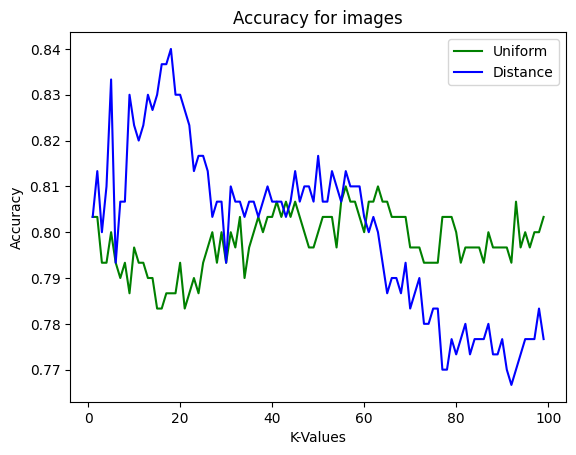

Uniform
max accuracy: 0.81
K value for max accuracy: 56

Distance
max accuracy: 0.84
K value for max accuracy: 18


In [50]:
k_values = range(1,100)
plt.plot(k_values, imgs_uniform_acc, 'g', label='Uniform')
plt.plot(k_values, imgs_distance_acc, 'b', label='Distance')
plt.title('Accuracy for images')
plt.xlabel('K-Values')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
print("Uniform")
print("max accuracy:", max(imgs_uniform_acc))
print("K value for max accuracy:", imgs_uniform_acc.index(max(imgs_uniform_acc))+1)
print()
print("Distance")
print("max accuracy:", max(imgs_distance_acc))
print("K value for max accuracy:", imgs_distance_acc.index(max(imgs_distance_acc))+1)

As you can see on the graph. Weighted KNN is better than Uniform KNN for lower K values but Uniform KNN is better than Weighted KNN for higher K values.

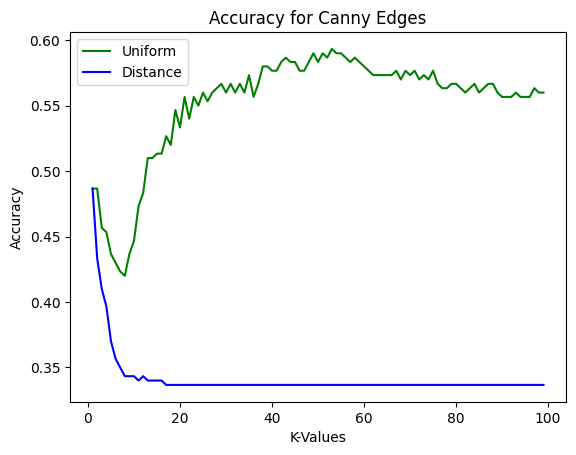

Uniform
max accuracy: 0.5933333333333334
K value for max accuracy: 53

Distance
max accuracy: 0.4866666666666667
K value for max accuracy: 1


In [51]:
k_values = range(1,100)
plt.plot(k_values, edges_uniform_acc, 'g', label='Uniform')
plt.plot(k_values, edges_distance_acc, 'b', label='Distance')
plt.title('Accuracy for Canny Edges')
plt.xlabel('K-Values')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
print("Uniform")
print("max accuracy:", max(edges_uniform_acc))
print("K value for max accuracy:", edges_uniform_acc.index(max(edges_uniform_acc))+1)
print()
print("Distance")
print("max accuracy:", max(edges_distance_acc))
print("K value for max accuracy:", edges_distance_acc.index(max(edges_distance_acc))+1)

As you can see on the graph Uniform KNN is much better than Weghted KNN for Canny Edges.

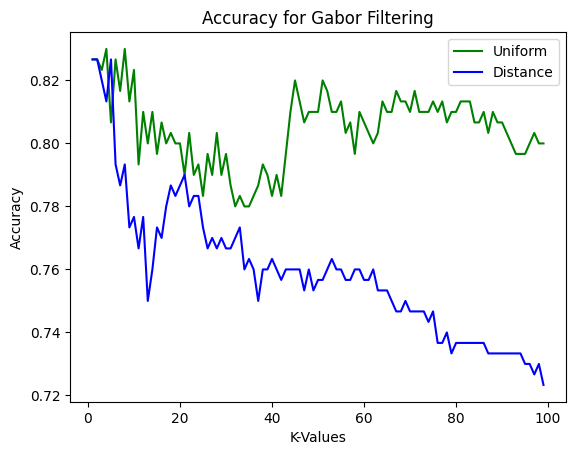

Uniform
max accuracy: 0.83
K value for max accuracy: 4

Distance
max accuracy: 0.8266666666666667
K value for max accuracy: 1


In [52]:
k_values = range(1,100)
plt.plot(k_values, gabor_uniform_acc, 'g', label='Uniform')
plt.plot(k_values, gabor_distance_acc, 'b', label='Distance')
plt.title('Accuracy for Gabor Filtering')
plt.xlabel('K-Values')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
print("Uniform")
print("max accuracy:", max(gabor_uniform_acc))
print("K value for max accuracy:", gabor_uniform_acc.index(max(gabor_uniform_acc))+1)
print()
print("Distance")
print("max accuracy:", max(gabor_distance_acc))
print("K value for max accuracy:", gabor_distance_acc.index(max(gabor_distance_acc))+1)

As you can see on the graph Gabor Filtering is a good filter since the accuracy is high enough. And, Uniform KNN is much better than Weighted KNN.

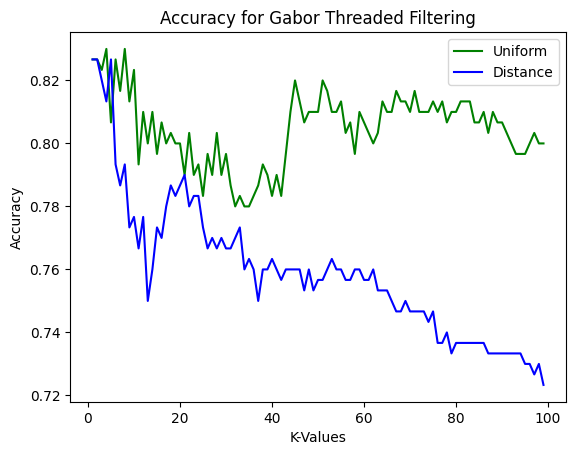

Uniform
max accuracy: 0.83
K value for max accuracy: 4

Distance
max accuracy: 0.8266666666666667
K value for max accuracy: 1


In [53]:
k_values = range(1,100)
plt.plot(k_values, gabor_threaded_uniform_acc, 'g', label='Uniform')
plt.plot(k_values, gabor_threaded_distance_acc, 'b', label='Distance')
plt.title('Accuracy for Gabor Threaded Filtering')
plt.xlabel('K-Values')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
print("Uniform")
print("max accuracy:", max(gabor_threaded_uniform_acc))
print("K value for max accuracy:", gabor_threaded_uniform_acc.index(max(gabor_threaded_uniform_acc))+1)
print()
print("Distance")
print("max accuracy:", max(gabor_threaded_distance_acc))
print("K value for max accuracy:", gabor_threaded_distance_acc.index(max(gabor_threaded_distance_acc))+1)

It is the same result with Gabor Filtering so we can say that gabor and gabor threaded are the same. As a result of it, I will not be using gabor threaded anymore.

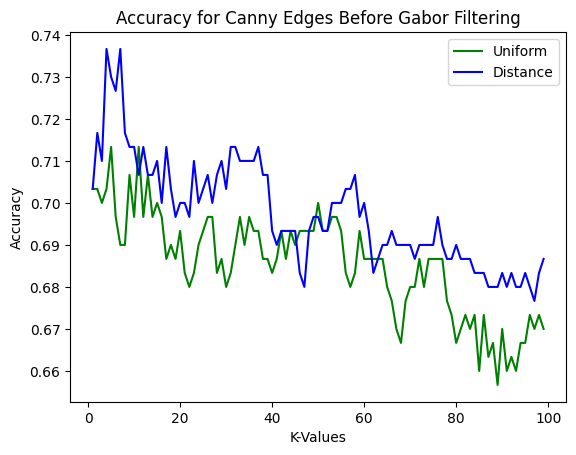

Uniform
max accuracy: 0.7133333333333334
K value for max accuracy: 5

Distance
max accuracy: 0.7366666666666667
K value for max accuracy: 4


In [59]:
k_values = range(1,100)
plt.plot(k_values, edges_gabor_uniform_acc, 'g', label='Uniform')
plt.plot(k_values, edges_gabor_distance_acc, 'b', label='Distance')
plt.title('Accuracy for Canny Edges Before Gabor Filtering')
plt.xlabel('K-Values')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
print("Uniform")
print("max accuracy:", max(edges_gabor_uniform_acc))
print("K value for max accuracy:", edges_gabor_uniform_acc.index(max(edges_gabor_uniform_acc))+1)
print()
print("Distance")
print("max accuracy:", max(edges_gabor_distance_acc))
print("K value for max accuracy:", edges_gabor_distance_acc.index(max(edges_gabor_distance_acc))+1)

As you can see on the graph above, Weighted KNN is better than Uniform KNN for Canny edges Before Gabor Filtering.

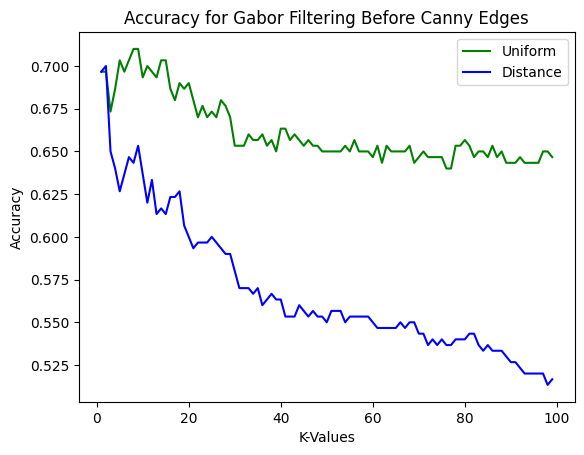

Uniform
max accuracy: 0.7133333333333334
K value for max accuracy: 8

Distance
max accuracy: 0.7366666666666667
K value for max accuracy: 2


In [55]:
k_values = range(1,100)
plt.plot(k_values, gabor_edges_uniform_acc, 'g', label='Uniform')
plt.plot(k_values, gabor_edges_distance_acc, 'b', label='Distance')
plt.title('Accuracy for Gabor Filtering Before Canny Edges')
plt.xlabel('K-Values')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
print("Uniform")
print("max accuracy:", max(edges_gabor_uniform_acc))
print("K value for max accuracy:", gabor_edges_uniform_acc.index(max(gabor_edges_uniform_acc))+1)
print()
print("Distance")
print("max accuracy:", max(edges_gabor_distance_acc))
print("K value for max accuracy:", gabor_edges_distance_acc.index(max(gabor_edges_distance_acc))+1)

As you can see Uniform KNN is much better than Weighted KNN.

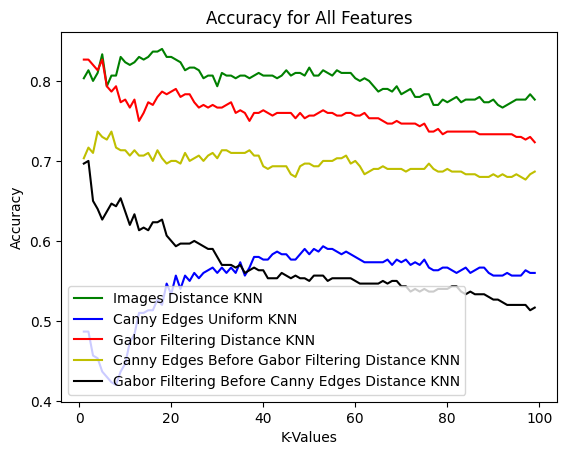

Images Distance KNN
max accuracy: 0.84
K value for max accuracy: 18

Canny Edges Uniform KNN
max accuracy: 0.5933333333333334
K value for max accuracy: 53

Gabor Filtering Uniform KNN
max accuracy: 0.83
K value for max accuracy: 4

Canny Edges Before Gabor Filtering Distance KNN
max accuracy: 0.7366666666666667
K value for max accuracy: 4

Gabor Filtering Before Canny Edges Uniform KNN
max accuracy: 0.71
K value for max accuracy: 8


In [60]:

k_values = range(1,100)
plt.plot(k_values, imgs_distance_acc, 'g', label='Images Distance KNN')
plt.plot(k_values, edges_uniform_acc, 'b', label='Canny Edges Uniform KNN')
plt.plot(k_values, gabor_distance_acc, 'r', label='Gabor Filtering Distance KNN')
plt.plot(k_values, edges_gabor_distance_acc, 'y', label='Canny Edges Before Gabor Filtering Distance KNN')
plt.plot(k_values, gabor_edges_distance_acc, 'k', label='Gabor Filtering Before Canny Edges Distance KNN')

plt.title('Accuracy for All Features')
plt.xlabel('K-Values')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
print("Images Distance KNN")
print("max accuracy:", max(imgs_distance_acc))
print("K value for max accuracy:", imgs_distance_acc.index(max(imgs_distance_acc))+1)
print()
print("Canny Edges Uniform KNN")
print("max accuracy:", max(edges_uniform_acc))
print("K value for max accuracy:", edges_uniform_acc.index(max(edges_uniform_acc))+1)
print()
print("Gabor Filtering Uniform KNN")
print("max accuracy:", max(gabor_uniform_acc))
print("K value for max accuracy:", gabor_uniform_acc.index(max(gabor_uniform_acc))+1)
print()
print("Canny Edges Before Gabor Filtering Distance KNN")
print("max accuracy:", max(edges_gabor_distance_acc))
print("K value for max accuracy:", edges_gabor_distance_acc.index(max(edges_gabor_distance_acc))+1)
print()
print("Gabor Filtering Before Canny Edges Uniform KNN")
print("max accuracy:", max(gabor_edges_uniform_acc))
print("K value for max accuracy:", gabor_edges_uniform_acc.index(max(gabor_edges_uniform_acc))+1)

As you can see on the graph is good for the data, canny edges is not. So We should use Gabor Filtering instead of Canny Edges.